<a href="https://colab.research.google.com/github/Shadi-Aldbaiss/Python/blob/main/EDA_heart_disease_uci___By_shadi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Library :**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

# **Read dataset**

In [4]:
df=pd.read_csv('/content/heart_disease_uci.csv')

# **Discovering dataset**

In [5]:
df.head()

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0

In [6]:
df.tail()

id  age     sex        dataset               cp  trestbps   chol    fbs  \
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False   

              restecg  thalch  exang  oldpeak slope  ca          thal  num  
915  st-t abnormality   154.0  False      0.0   NaN NaN           NaN    1  
916  st-t abnormality     NaN    NaN      NaN   NaN NaN           NaN    0  
917  st-t abnormality   100.0  False      0.0   NaN NaN  fixed defect    2  
918    lv hypertrophy     NaN    NaN      NaN   NaN NaN           NaN    0  
919    lv hypertrophy    93.0   True      0.0   NaN NaN           NaN    1

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [8]:
df.isnull().mean()*100

id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64

In [9]:
df.shape

(920, 16)

In [10]:
df.count()

id          920
age         920
sex         920
dataset     920
cp          920
trestbps    861
chol        890
fbs         830
restecg     918
thalch      865
exang       865
oldpeak     858
slope       611
ca          309
thal        434
num         920
dtype: int64

In [11]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(df[col].value_counts())
        print('------------------------\n')


sex
Male      726
Female    194
Name: count, dtype: int64
------------------------

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64
------------------------

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64
------------------------

fbs
False    692
True     138
Name: count, dtype: int64
------------------------

restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64
------------------------

exang
False    528
True     337
Name: count, dtype: int64
------------------------

slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64
------------------------

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64
------------------------



In [12]:
df.describe(include='all')

id         age   sex    dataset            cp    trestbps  \
count   920.000000  920.000000   920        920           920  861.000000   
unique         NaN         NaN     2          4             4         NaN   
top            NaN         NaN  Male  Cleveland  asymptomatic         NaN   
freq           NaN         NaN   726        304           496         NaN   
mean    460.500000   53.510870   NaN        NaN           NaN  132.132404   
std     265.725422    9.424685   NaN        NaN           NaN   19.066070   
min       1.000000   28.000000   NaN        NaN           NaN    0.000000   
25%     230.750000   47.000000   NaN        NaN           NaN  120.000000   
50%     460.500000   54.000000   NaN        NaN           NaN  130.000000   
75%     690.250000   60.000000   NaN        NaN           NaN  140.000000   
max     920.000000   77.000000   NaN        NaN           NaN  200.000000   

              chol    fbs restecg      thalch  exang     oldpeak slope  \
count   890.000000    830     918  865.000000    865  858.000000   611   
unique         NaN      2       3         NaN      2         NaN     3   
top            NaN  False  normal         NaN  False         NaN  flat   
freq           NaN    692     551         NaN    528         NaN   345   
mean    199.130337    NaN     NaN  137.545665    NaN    0.878788   NaN   
std     110.780810    NaN     NaN   25.926276    NaN    1.091226   NaN   
min       0.000000    NaN     NaN   60.000000    NaN   -2.600000   NaN   
25%     175.000000    NaN     NaN  120.000000    NaN    0.000000   NaN   
50%     223.000000    NaN     NaN  140.000000    NaN    0.500000   NaN   
75%     268.000000    NaN     NaN  157.000000    NaN    1.500000   NaN   
max     603.000000    NaN     NaN  202.000000    NaN    6.200000   NaN   

                ca    thal         num  
count   309.000000     434  920.000000  
unique         NaN       3         NaN  
top            NaN  normal         NaN  
freq           NaN     196         NaN  
mean      0.676375     NaN    0.995652  
std       0.935653     NaN    1.142693  
min       0.000000     NaN    0.000000  
25%       0.000000     NaN    0.000000  
50%       0.000000     NaN    1.000000  
75%       1.000000     NaN    2.000000  
max       3.000000     NaN    4.000000

# **Seprate Numerical data and Categorical Data**

In [13]:
cat_col=df.select_dtypes(include='object')
num_col=df.select_dtypes(include='number')
print('cat_col: ',cat_col.columns)
print('num_col: ',num_col.columns)

cat_col:  Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')
num_col:  Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')


# **EDA**

## **UNIVARIATE ANALYSIS**

Histogram of :  age




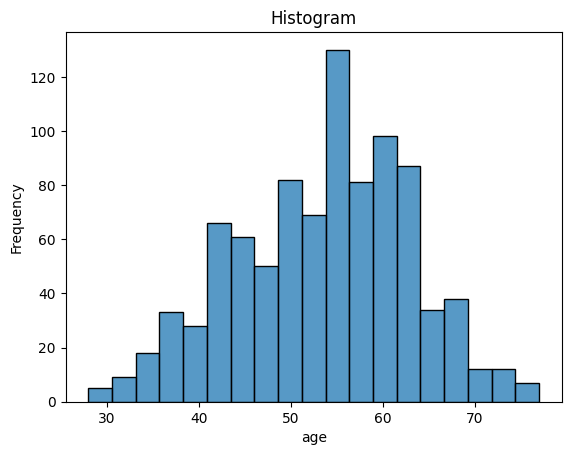



Histogram of :  trestbps




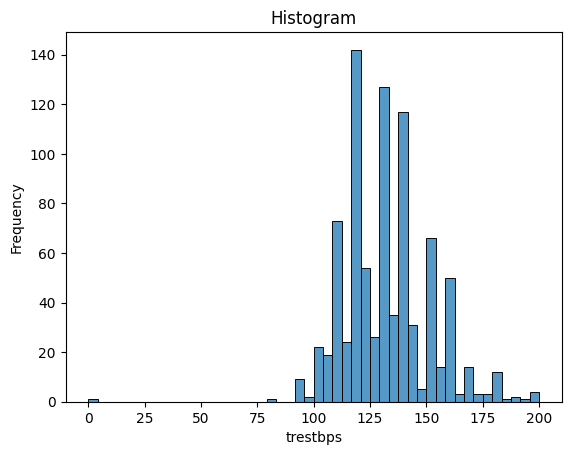



Histogram of :  chol




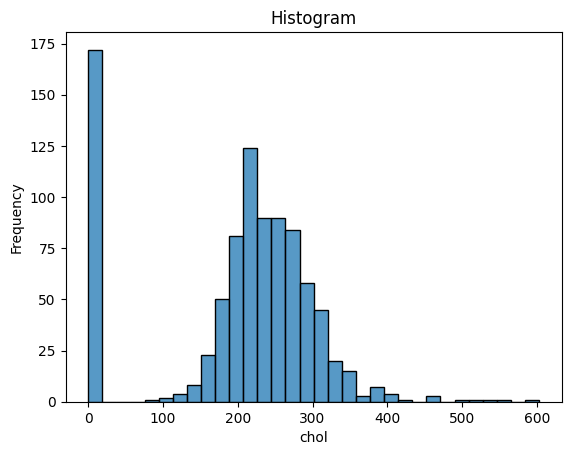



Histogram of :  thalch




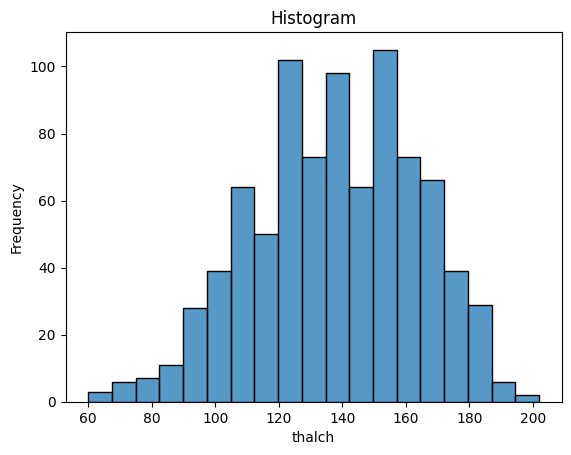



Histogram of :  oldpeak




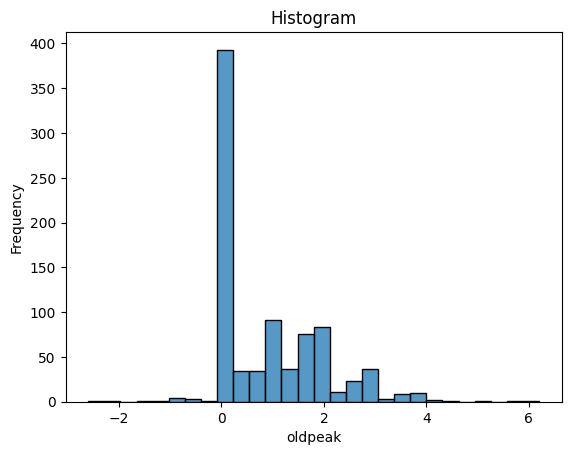



Histogram of :  ca




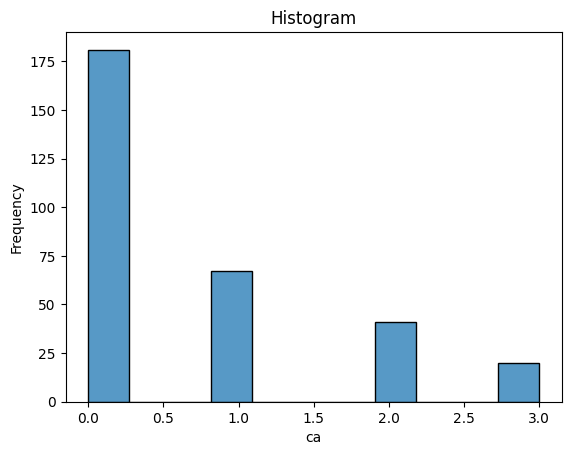



Histogram of :  num




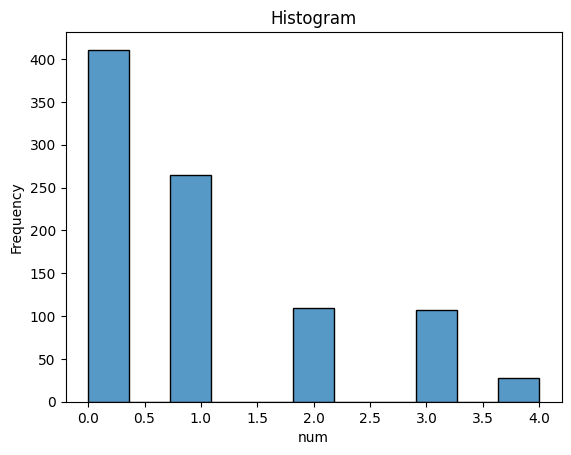

In [14]:
#histogram data ....continuous

for col in df.select_dtypes(include='number'):
      if col != 'id':
        print('Histogram of : ',col)
        print('\n')
        sns.histplot(df[col])
        plt.title('Histogram')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
        print('\n')

Density curve (KDE) of :  age




<ipython-input-15-8ebb497189d1>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True,color='blue')


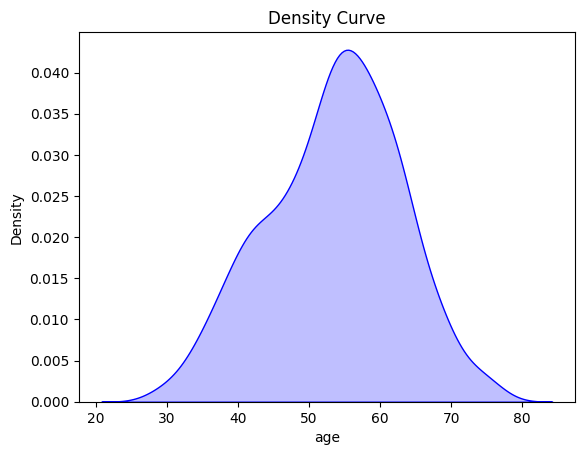



Density curve (KDE) of :  trestbps




<ipython-input-15-8ebb497189d1>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True,color='blue')


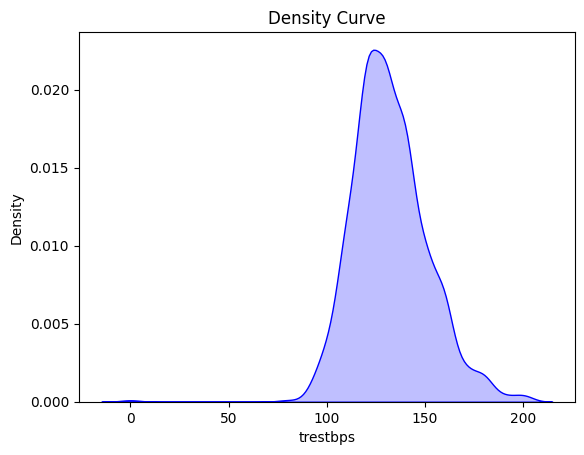



Density curve (KDE) of :  chol




<ipython-input-15-8ebb497189d1>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True,color='blue')


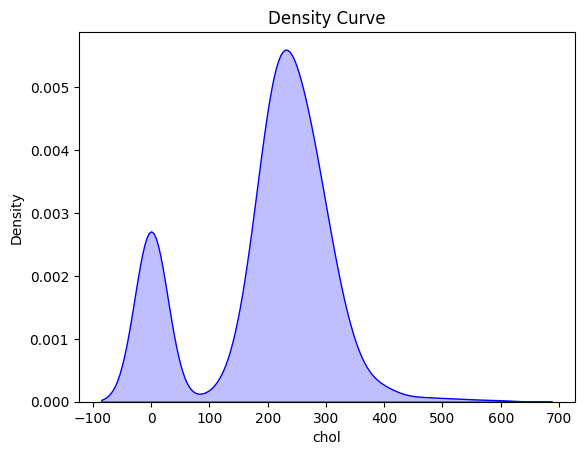



Density curve (KDE) of :  thalch




<ipython-input-15-8ebb497189d1>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True,color='blue')


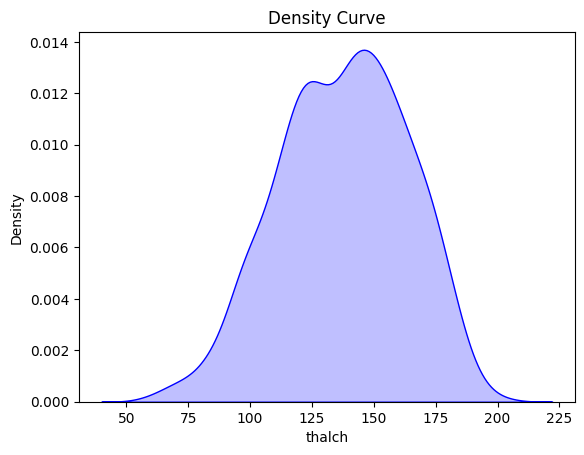



Density curve (KDE) of :  oldpeak




<ipython-input-15-8ebb497189d1>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True,color='blue')


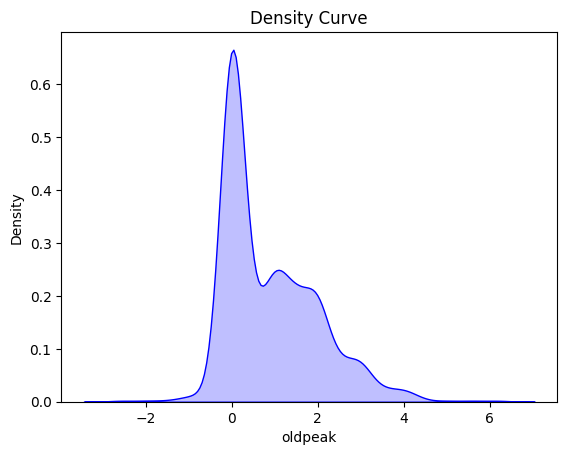



Density curve (KDE) of :  ca




<ipython-input-15-8ebb497189d1>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True,color='blue')


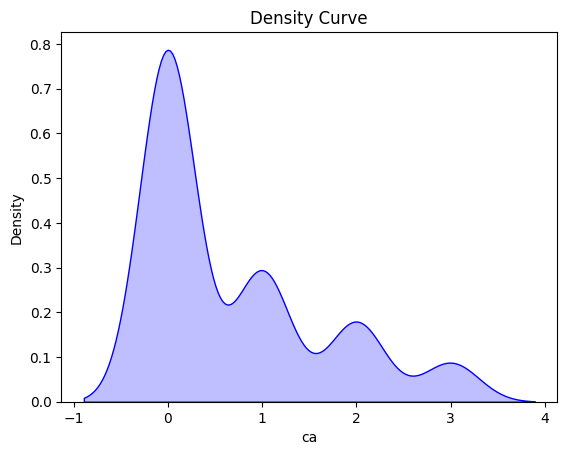



Density curve (KDE) of :  num




<ipython-input-15-8ebb497189d1>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True,color='blue')


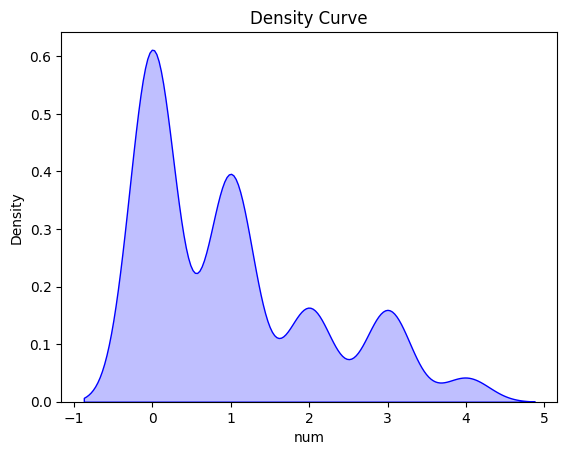

In [15]:
#Density curve (KDE):,numerical data ....continuous

for col in df.select_dtypes(include='number'):
      if col != 'id':
        print('Density curve (KDE) of : ',col)
        print('\n')
        sns.kdeplot(df[col], shade=True,color='blue')
        plt.title('Density Curve')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.show()
        print('\n')

Boxplot of :  age


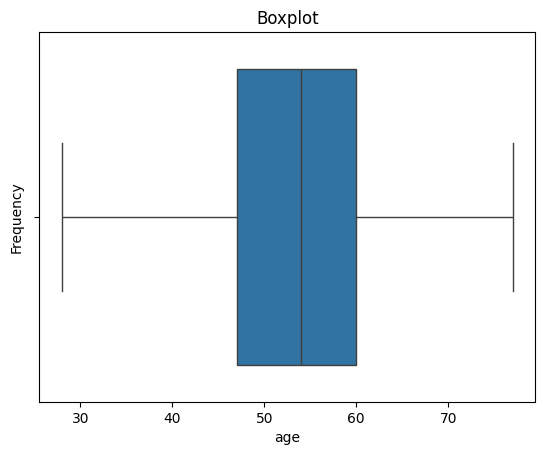



Boxplot of :  trestbps


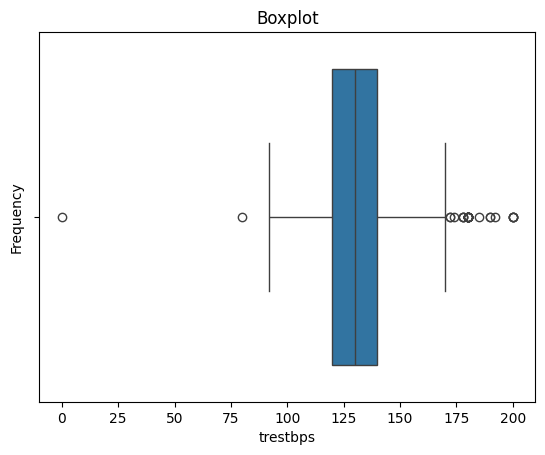



Boxplot of :  chol


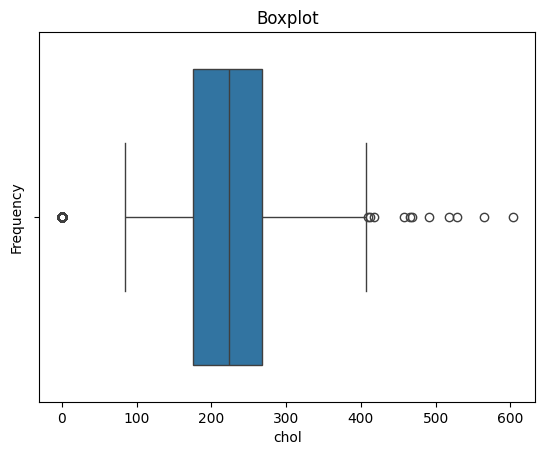



Boxplot of :  thalch


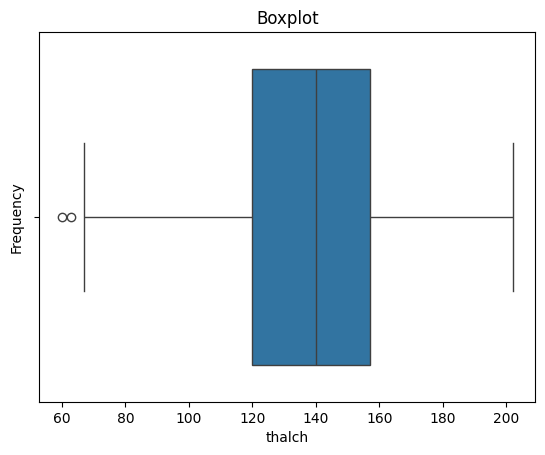



Boxplot of :  oldpeak


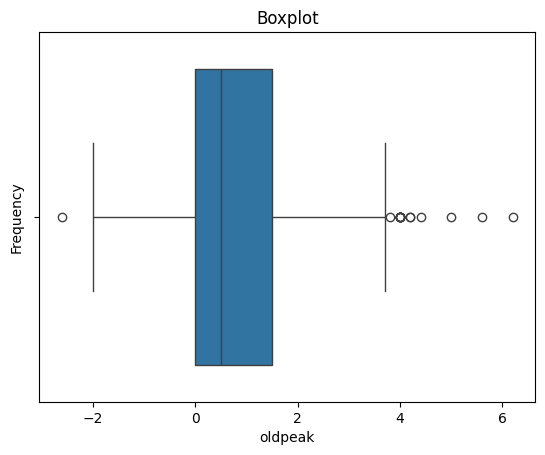



Boxplot of :  ca


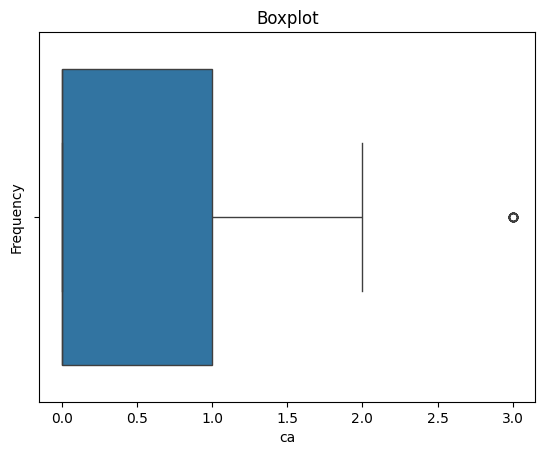



Boxplot of :  num


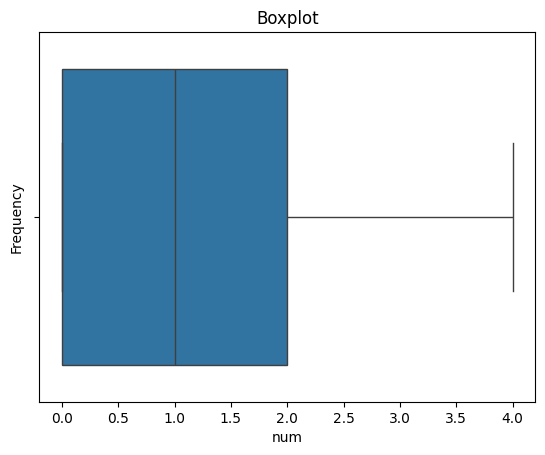

In [16]:
#boxplot data ....continuous

for col in df.select_dtypes(include='number'):
      if col != 'id':
        print('Boxplot of : ',col)
        sns.boxplot(x=df[col])
        plt.title('Boxplot')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
        print('\n')


Violin of :  age


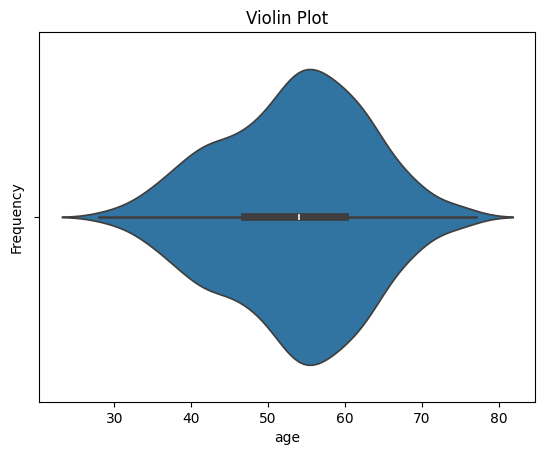



Violin of :  trestbps


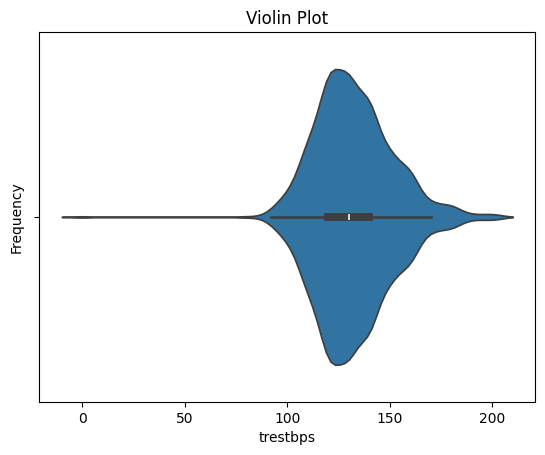



Violin of :  chol


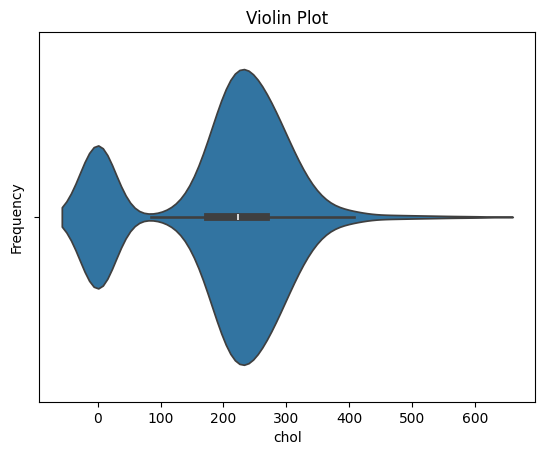



Violin of :  thalch


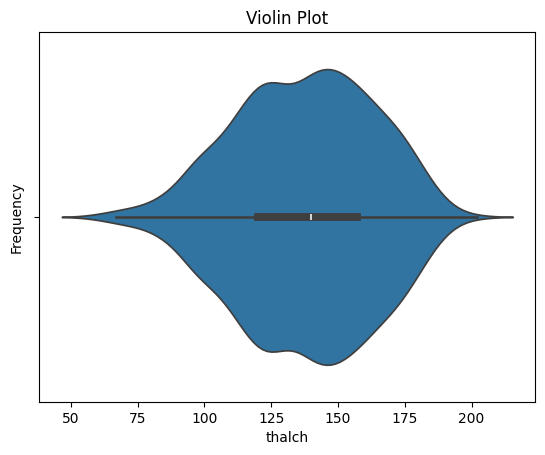



Violin of :  oldpeak


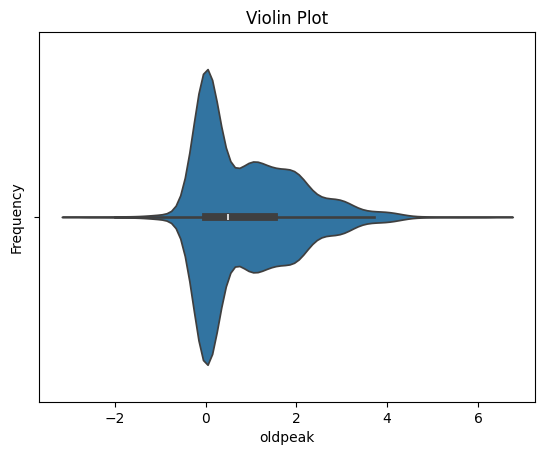



Violin of :  ca


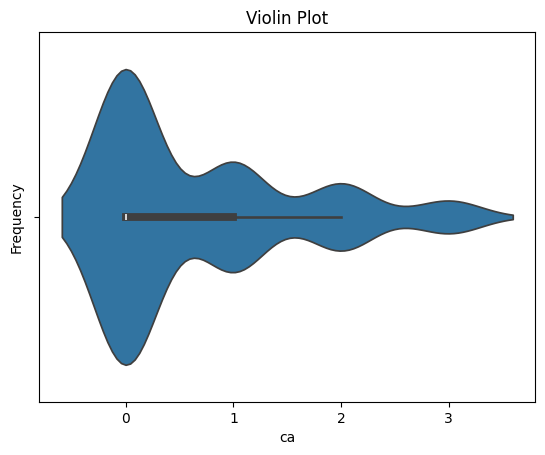



Violin of :  num


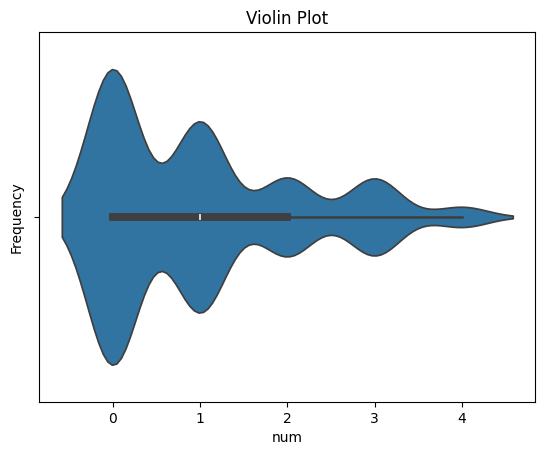

In [17]:
#violin: data ....continuous

for col in df.select_dtypes(include='number'):
      if col != 'id':
        print('Violin of : ',col)
        sns.violinplot(x=df[col])
        plt.title('Violin Plot')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
        print('\n')


Bar plot of :  sex


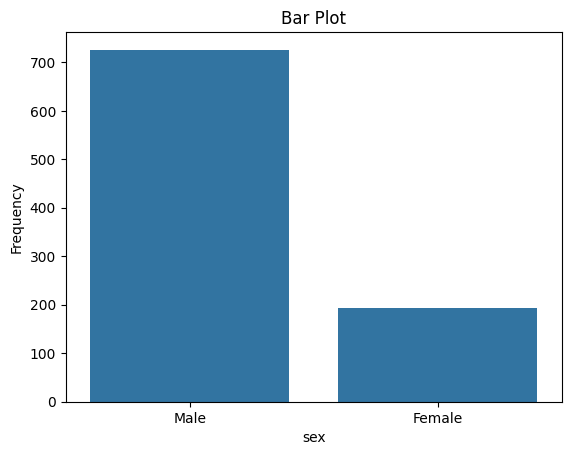



Bar plot of :  dataset


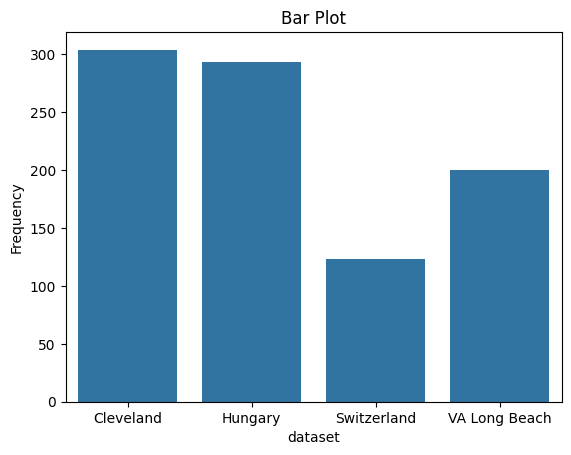



Bar plot of :  cp


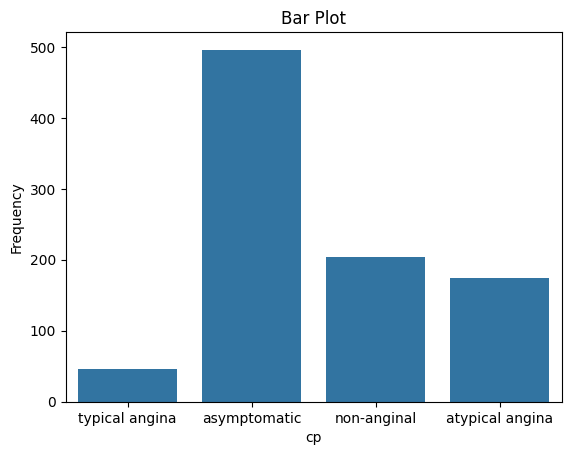



Bar plot of :  fbs


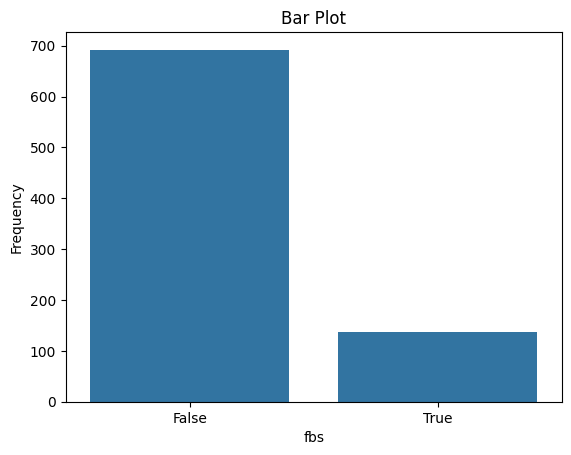



Bar plot of :  restecg


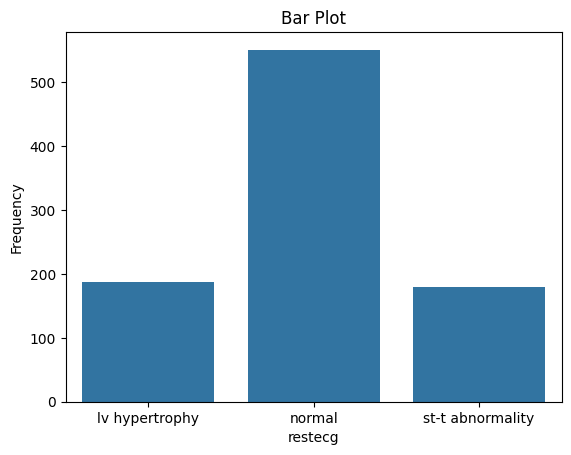



Bar plot of :  exang


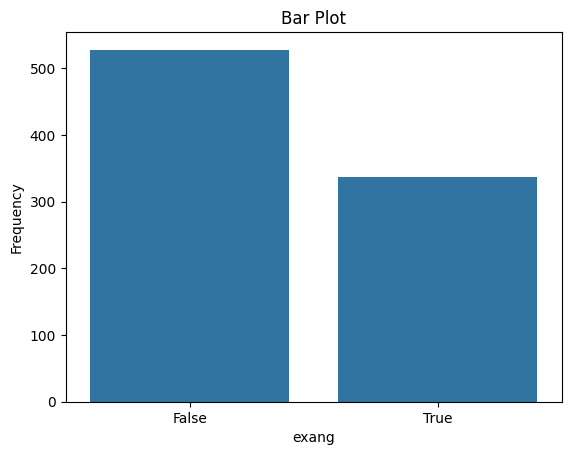



Bar plot of :  slope


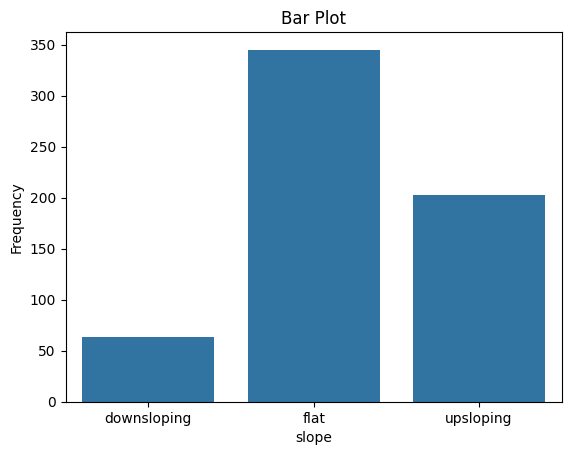



Bar plot of :  thal


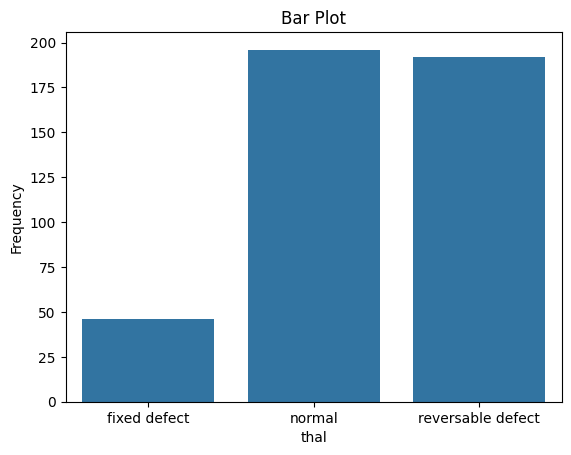



Bar plot of : num


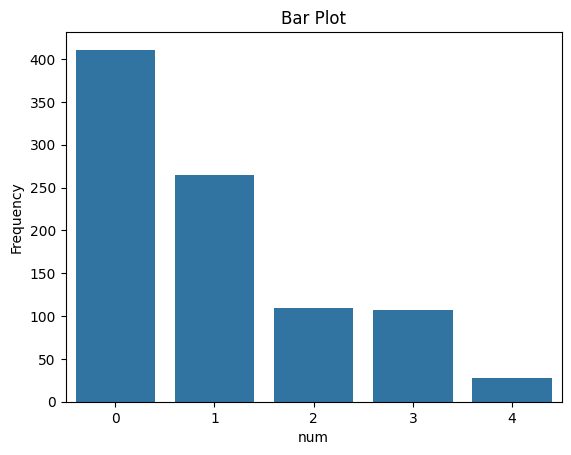

In [18]:
#bar plot :categorical data

for col in df.select_dtypes(include='object'):
        print('Bar plot of : ',col)
        sns.countplot(x=df[col])
        plt.title('Bar Plot')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
        print('\n')

print('Bar plot of : num')
sns.countplot(x=df['num'])
plt.title('Bar Plot')
plt.xlabel('num')
plt.ylabel('Frequency')
plt.show()
print('\n')


Pie chart of :  sex


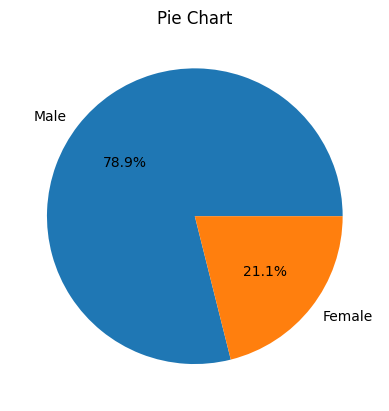



Pie chart of :  dataset


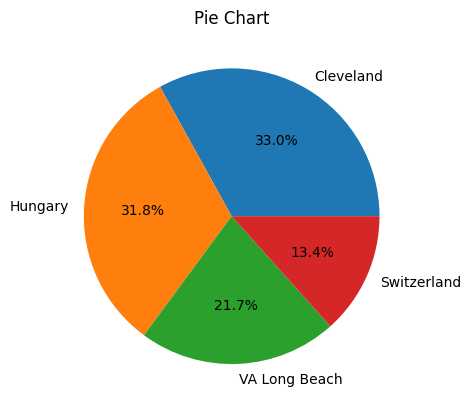



Pie chart of :  cp


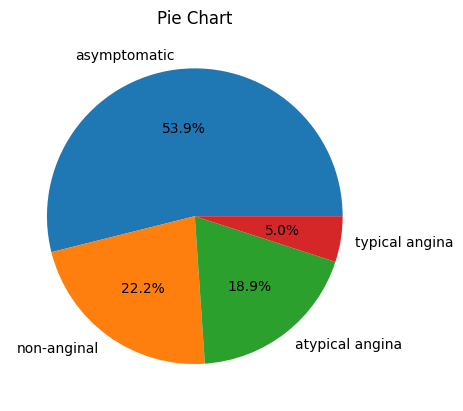



Pie chart of :  fbs


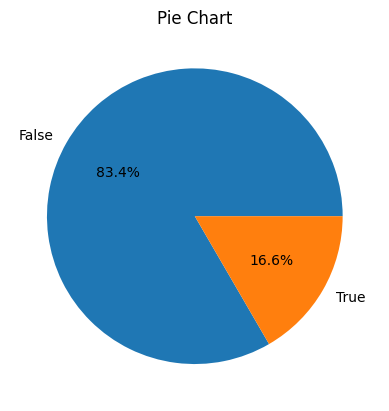



Pie chart of :  restecg


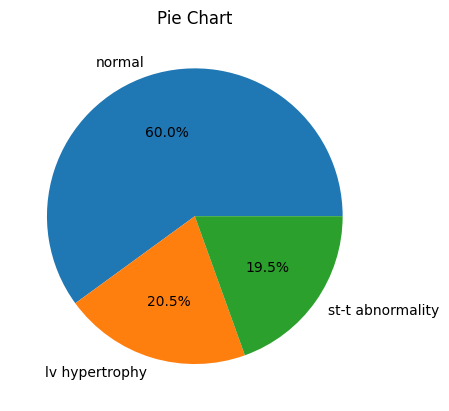



Pie chart of :  exang


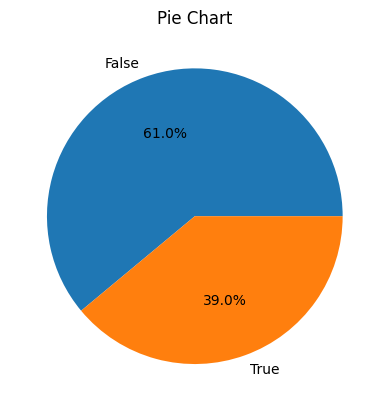



Pie chart of :  slope


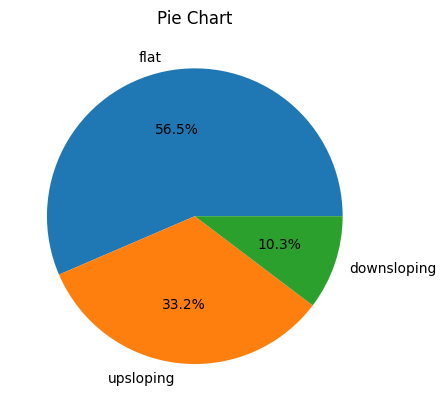



Pie chart of :  thal


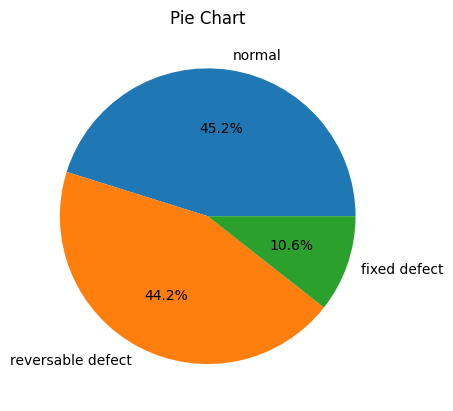

In [19]:
#pie chart :
for col in df.select_dtypes(include='object'):
        if col != 'num':
          print('Pie chart of : ',col)
          plt.pie(df[col].value_counts(), labels=df[col].value_counts().index, autopct='%1.1f%%')
          plt.title('Pie Chart')
          plt.show()
          print('\n')

## Bivariate Analysis

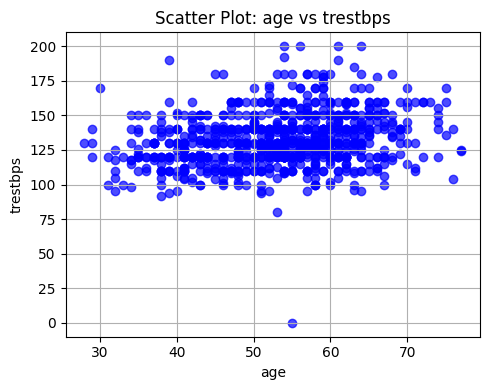

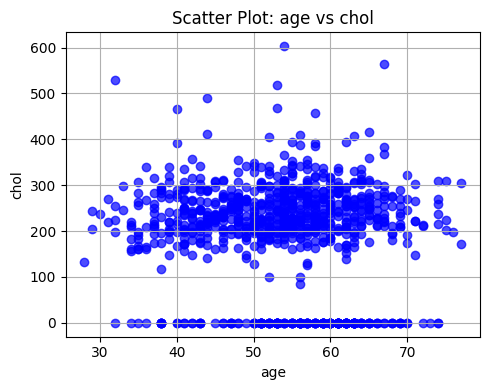

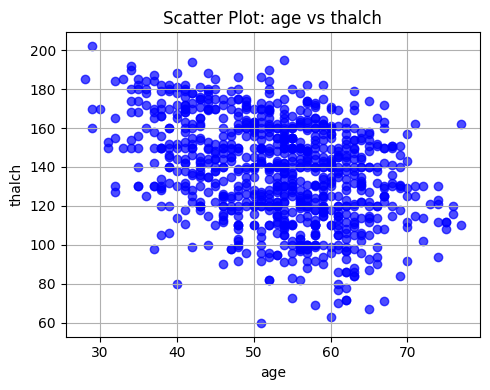

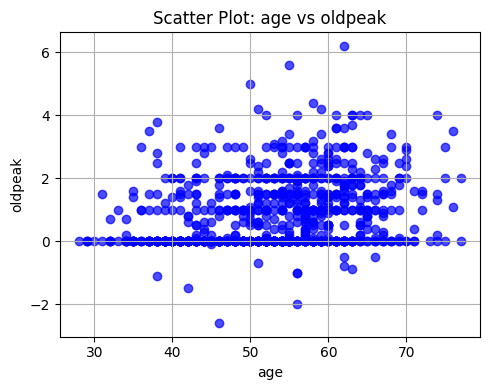

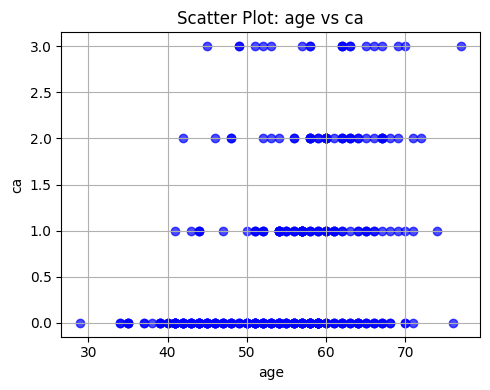

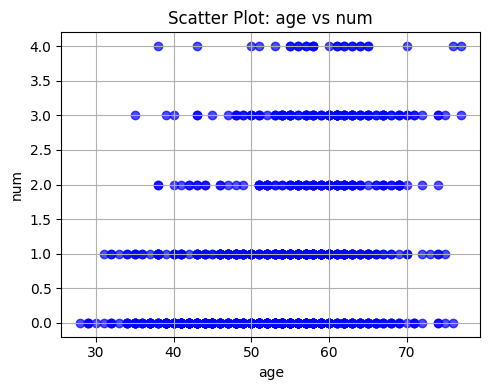

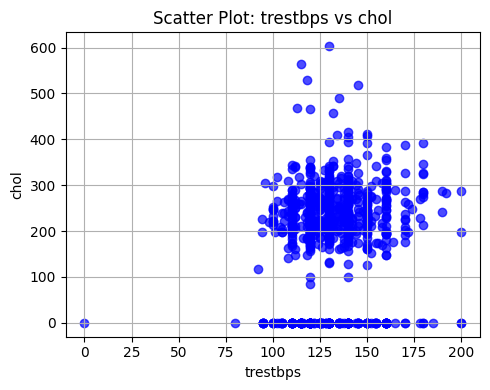

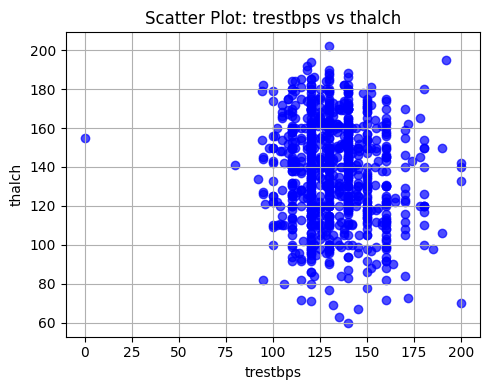

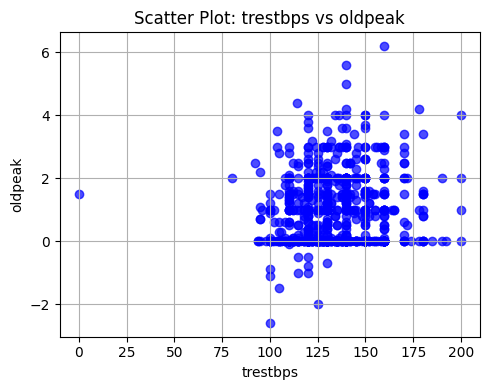

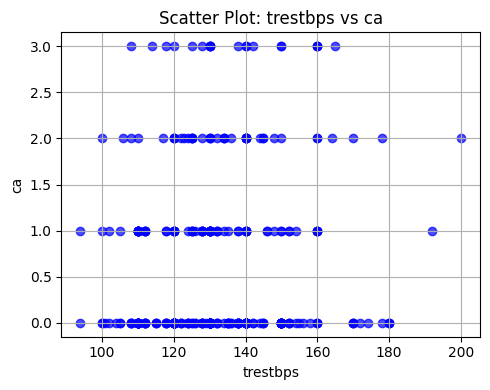

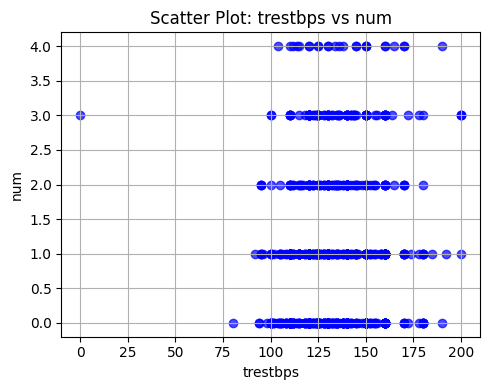

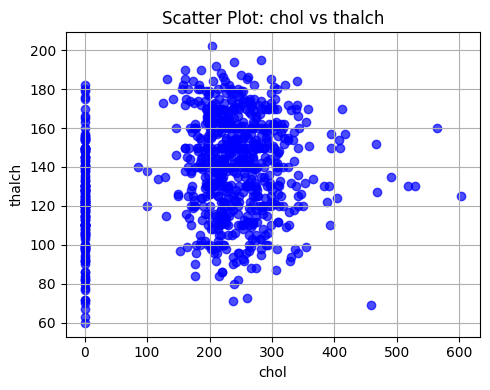

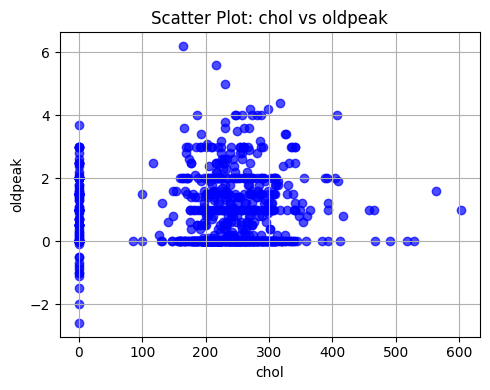

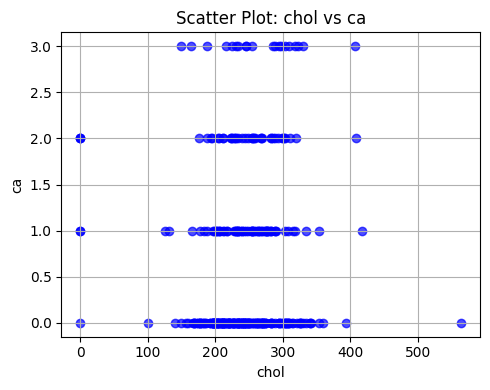

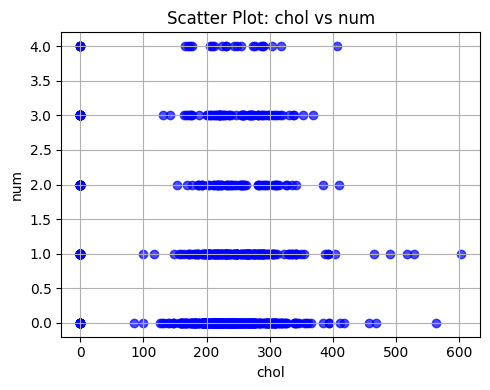

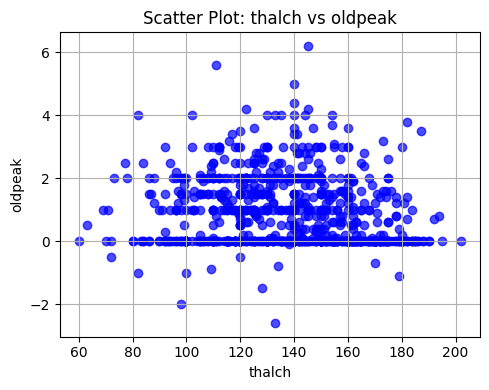

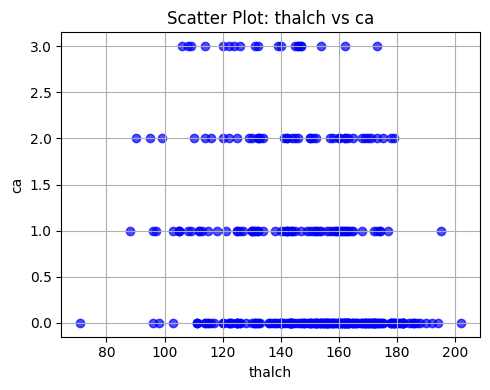

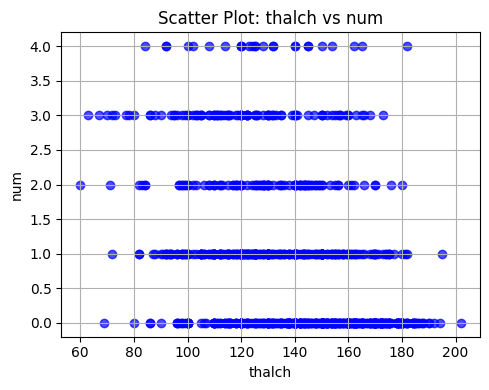

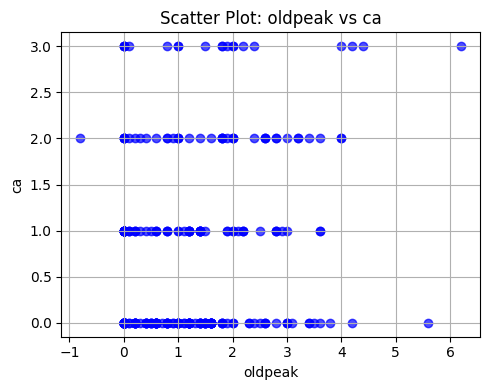

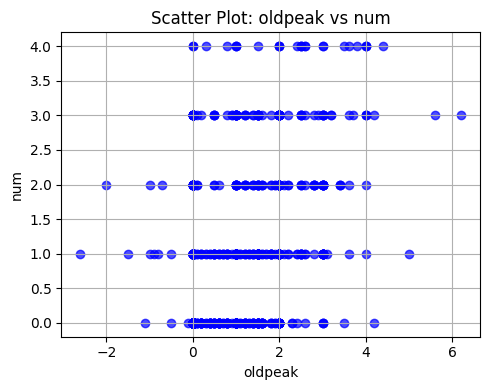

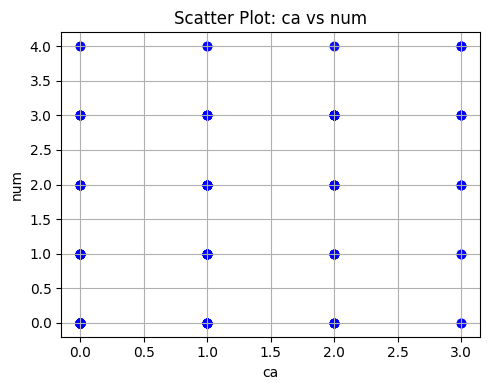

In [20]:

num_cols = df.select_dtypes(include='number').columns

for col1, col2 in combinations(num_cols, 2):
  if col1 != 'id' and col2 != 'id':
    plt.figure(figsize=(5, 4))
    plt.scatter(df[col1], df[col2], color='blue', alpha=0.7)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'Scatter Plot: {col1} vs {col2}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

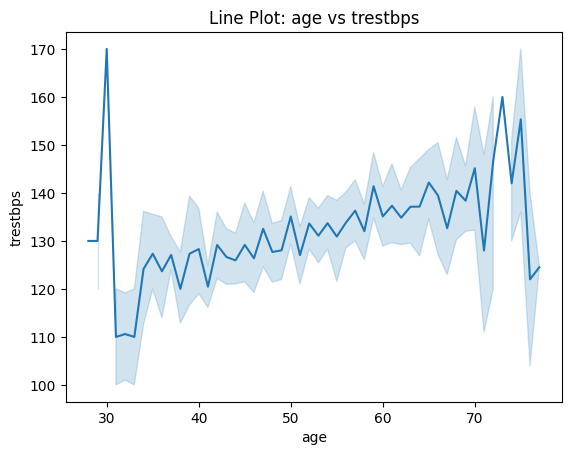

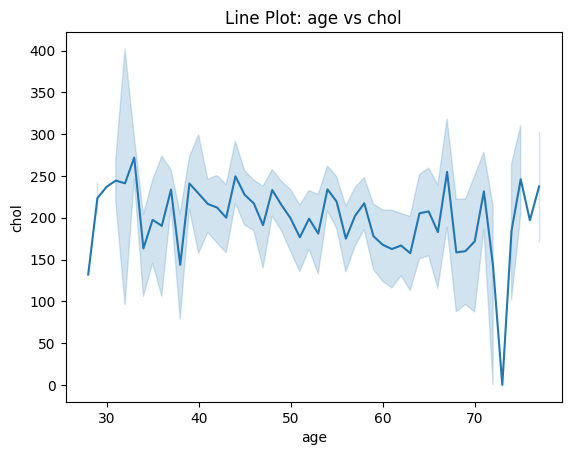

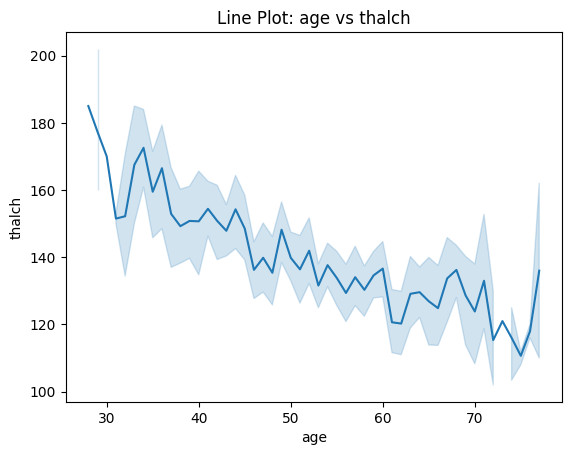

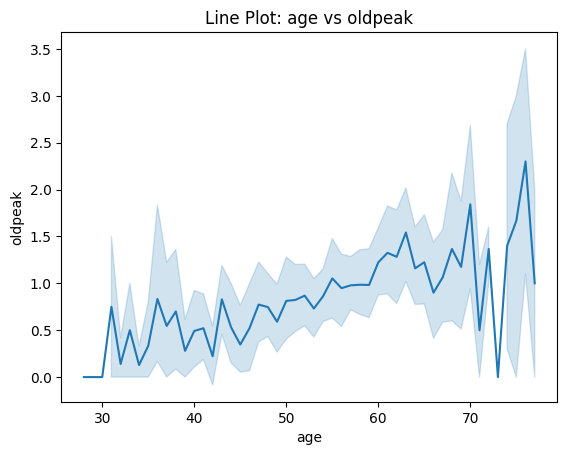

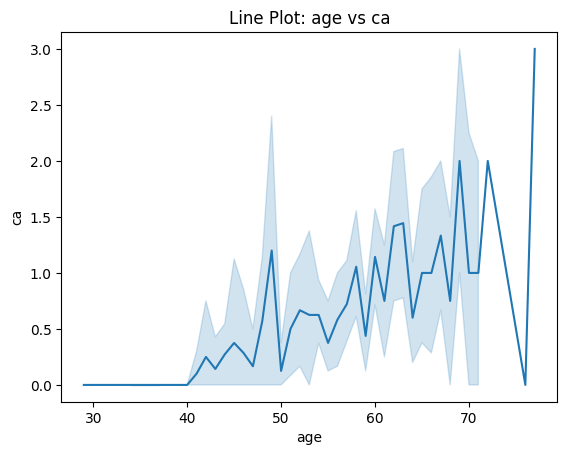

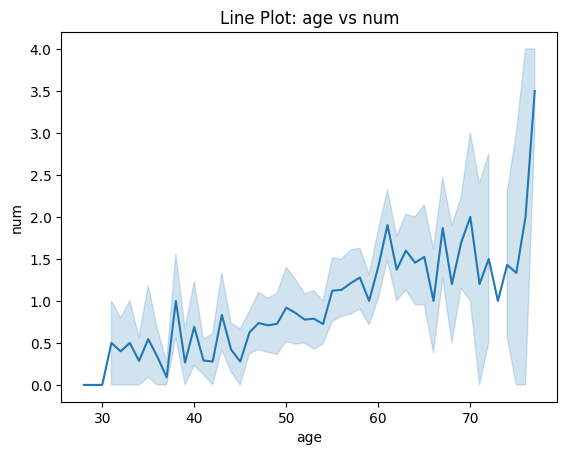

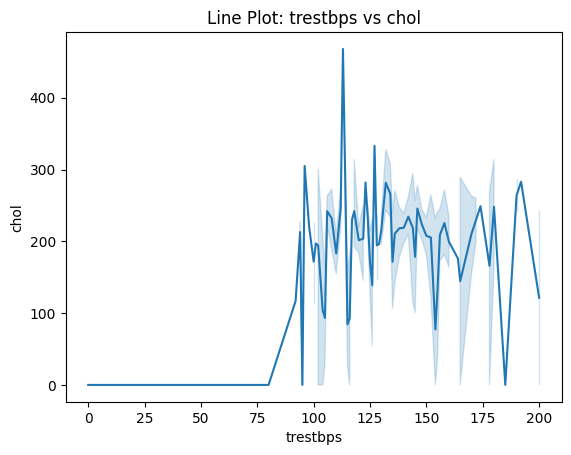

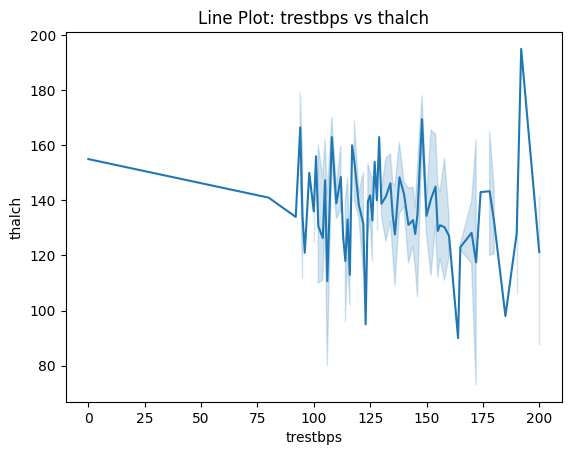

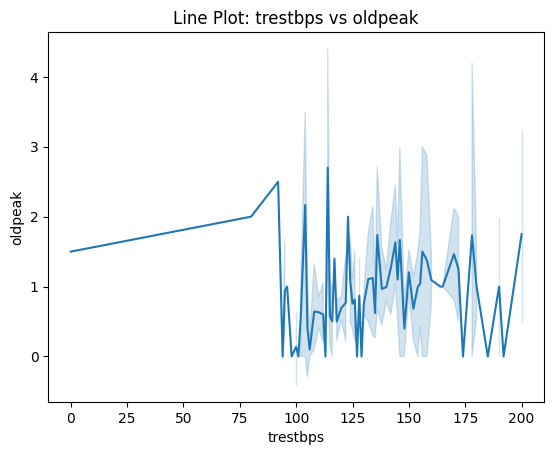

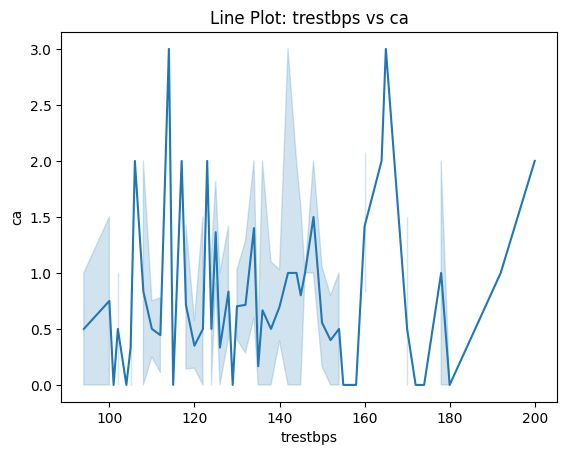

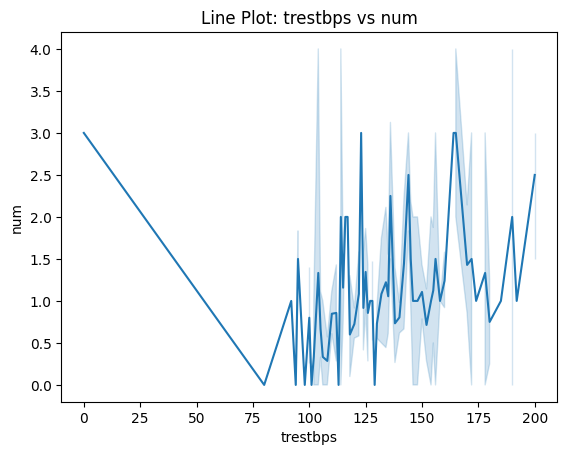

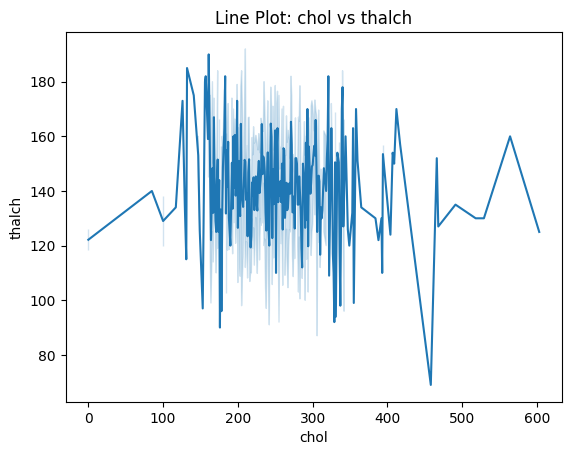

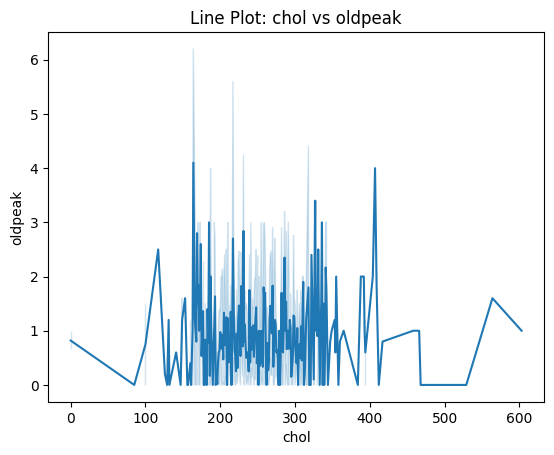

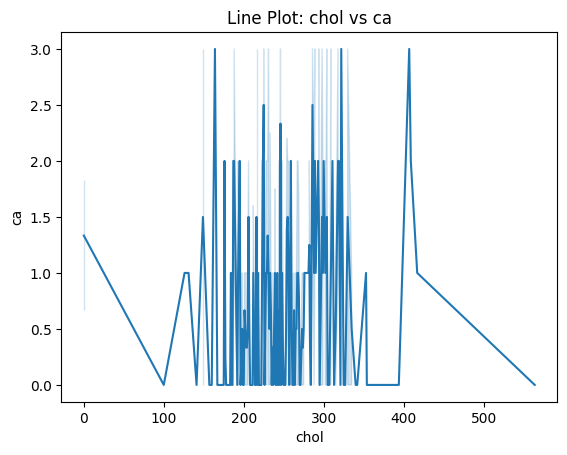

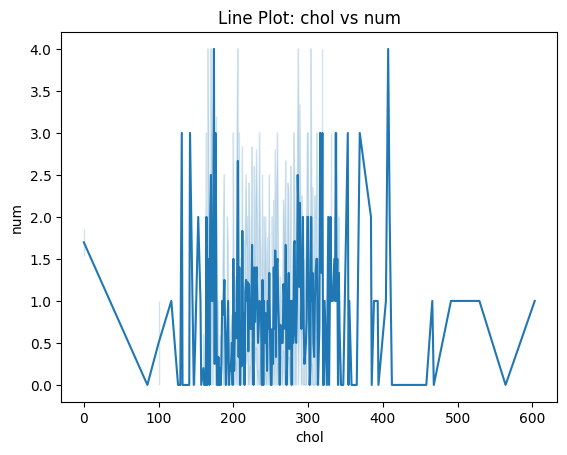

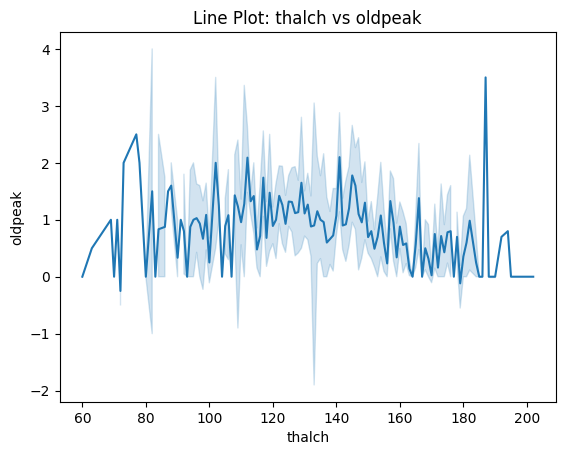

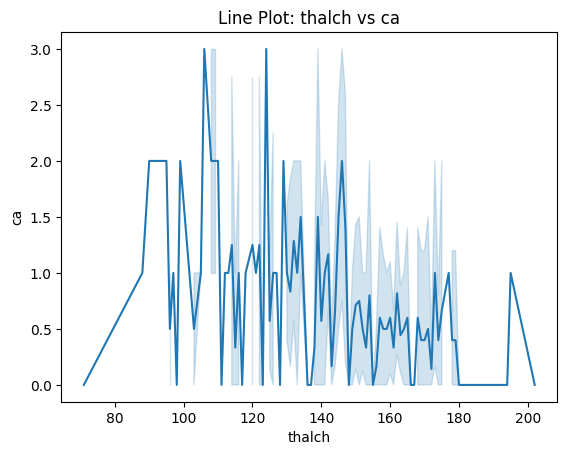

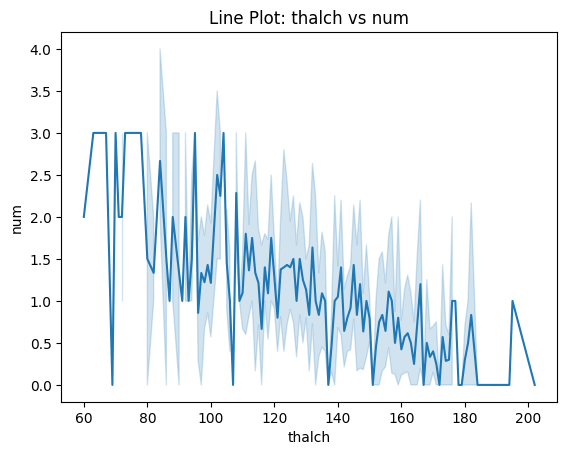

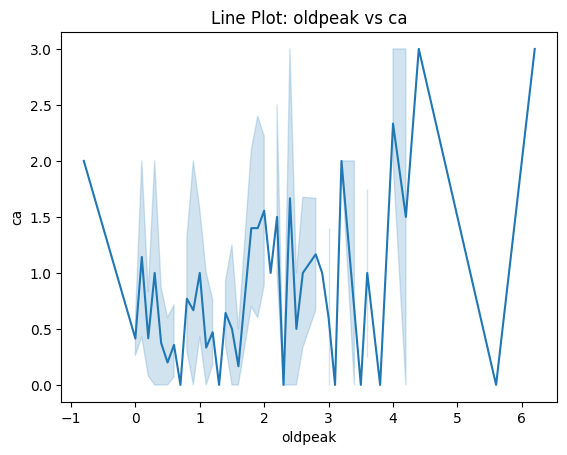

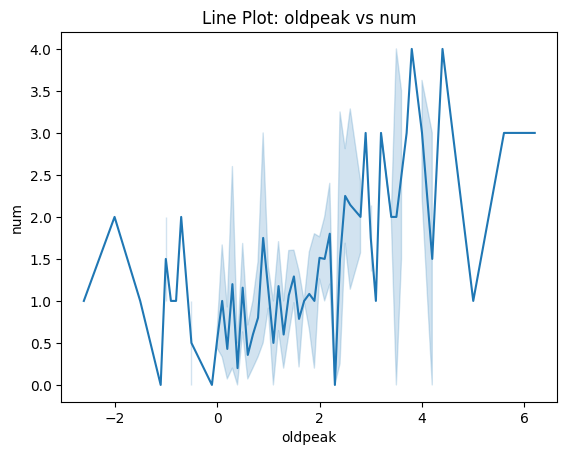

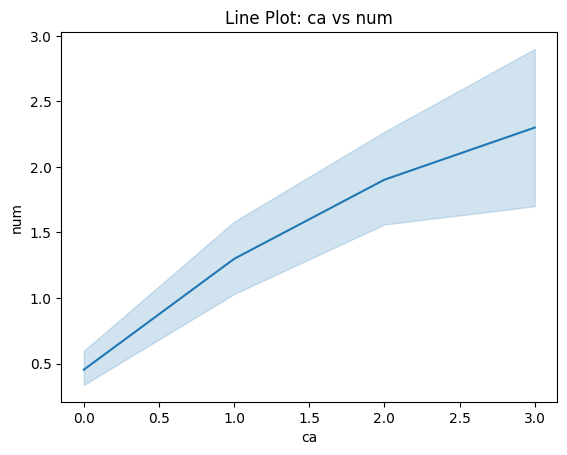

In [21]:
#line plot: num vs num
num_cols = df.select_dtypes(include='number').columns

for col1, col2 in combinations(num_cols, 2):
  if col1 != 'id' and col2 != 'id':
    plt.title(f'Line Plot: {col1} vs {col2}')
    sns.lineplot(x=df[col1], y=df[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

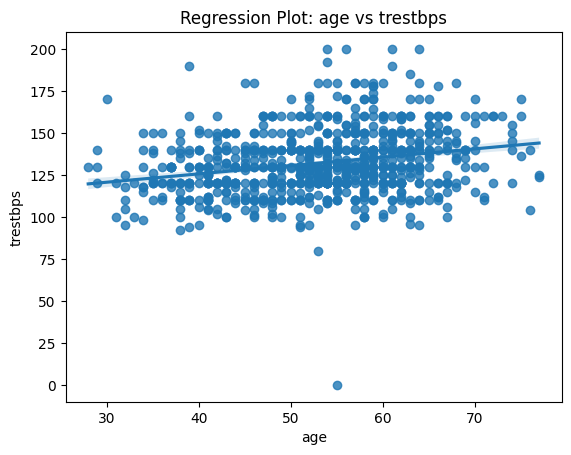

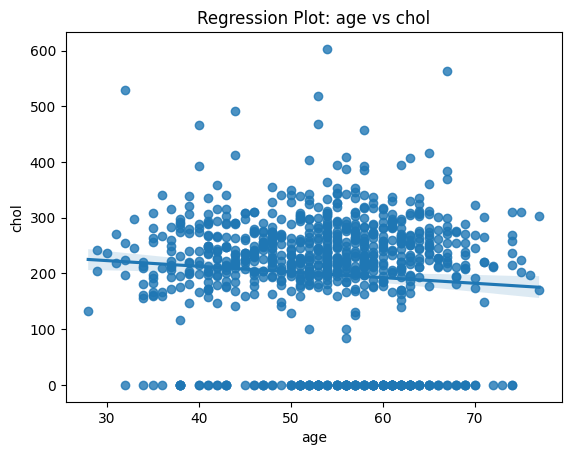

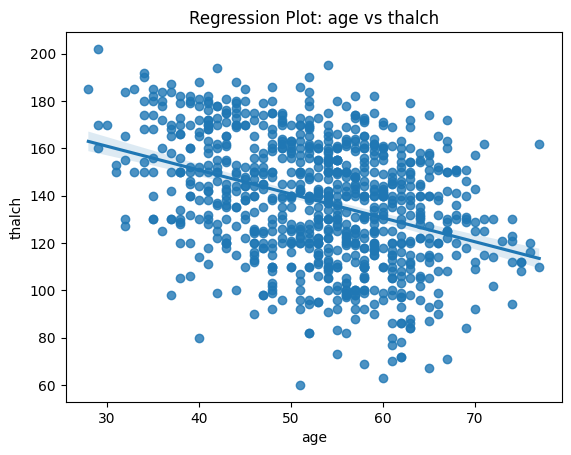

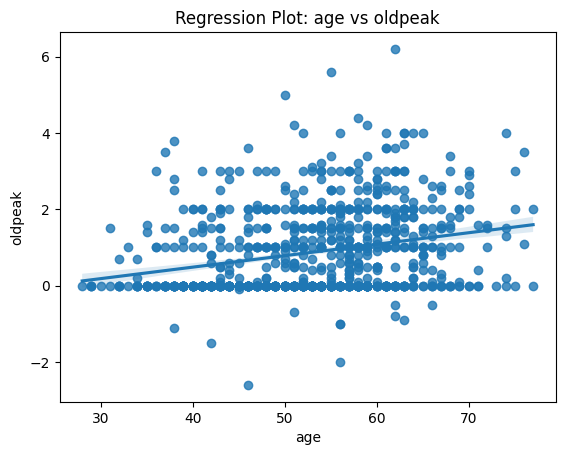

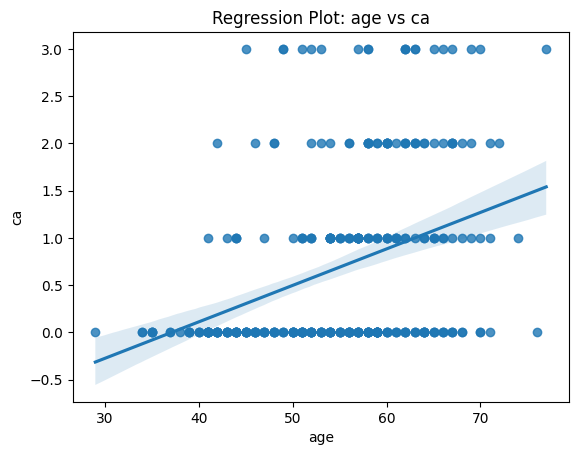

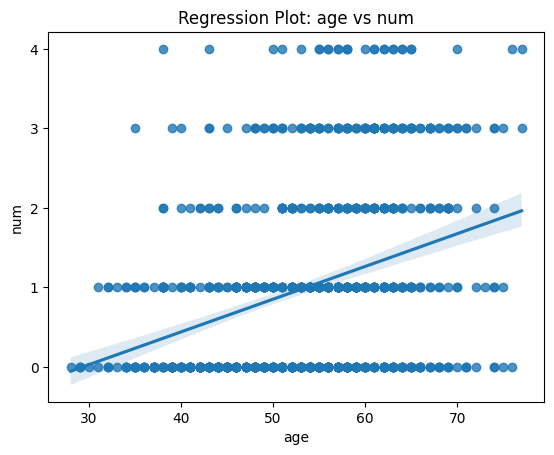

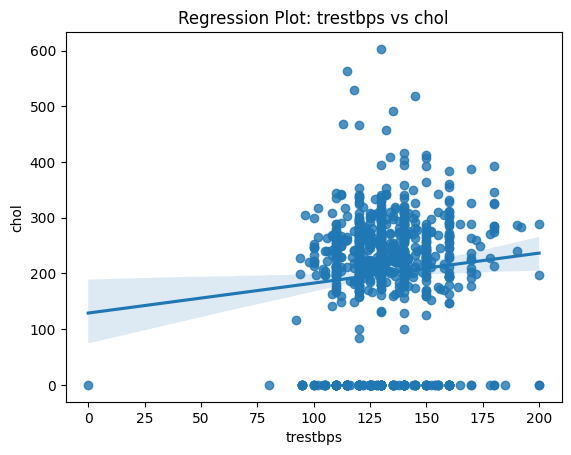

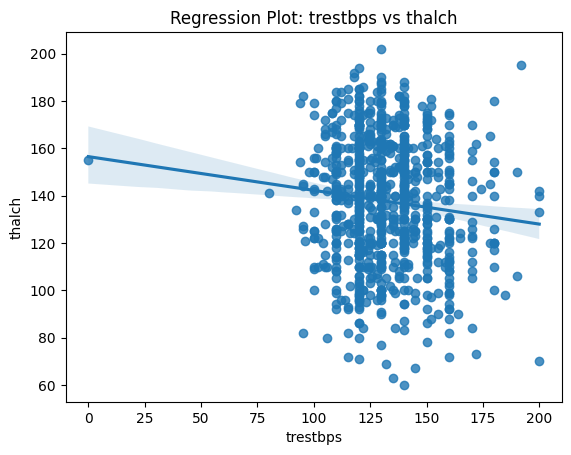

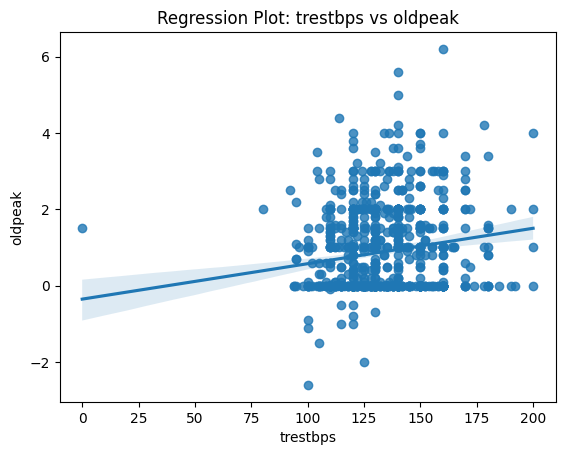

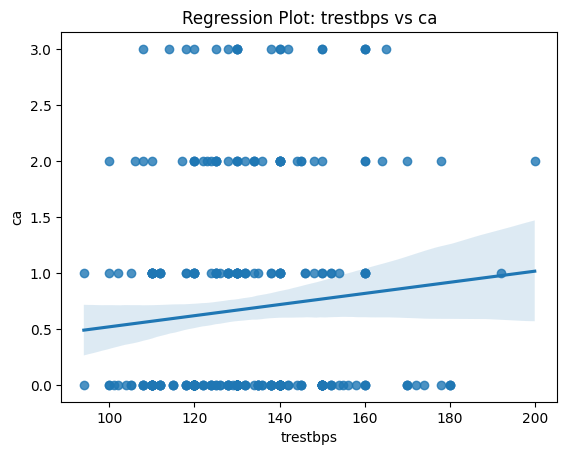

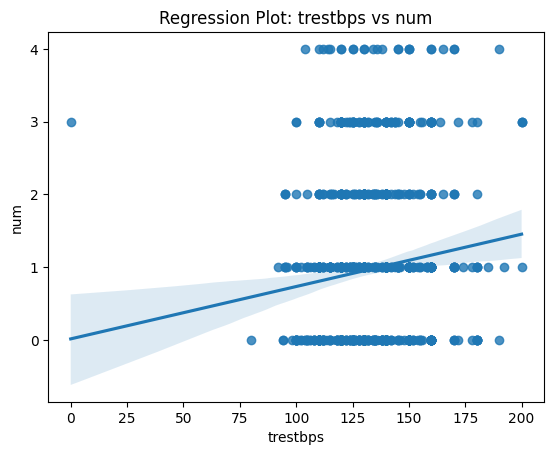

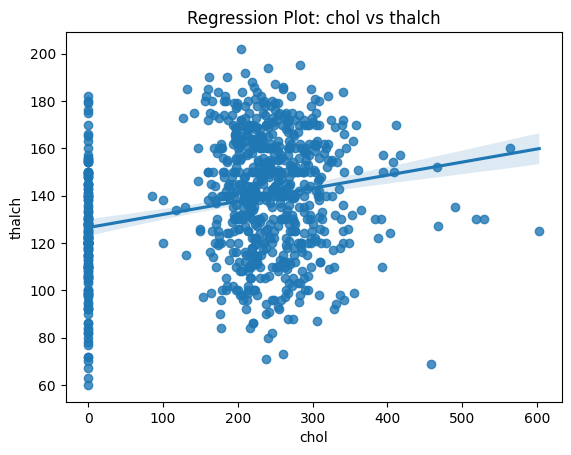

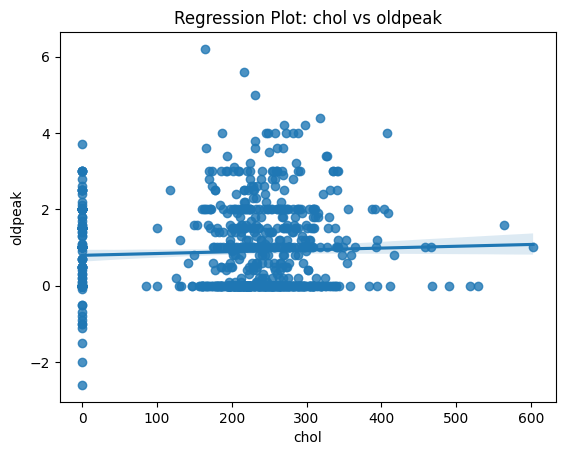

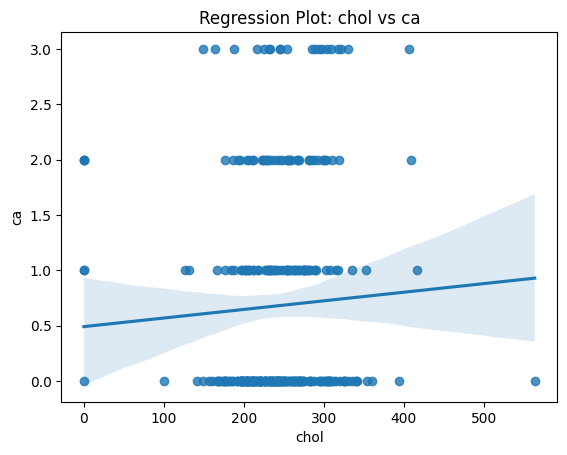

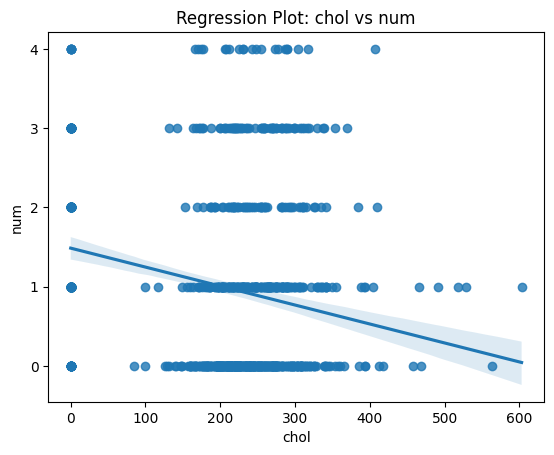

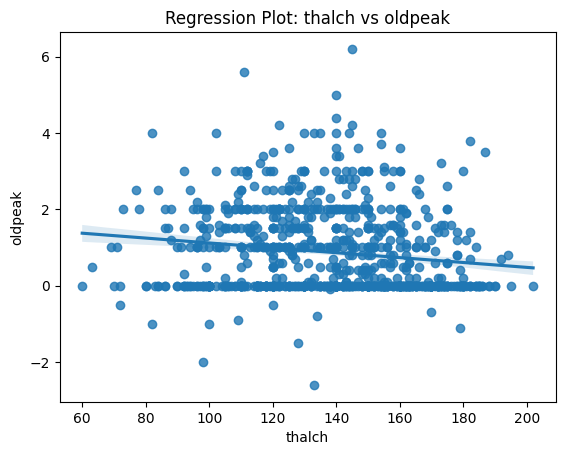

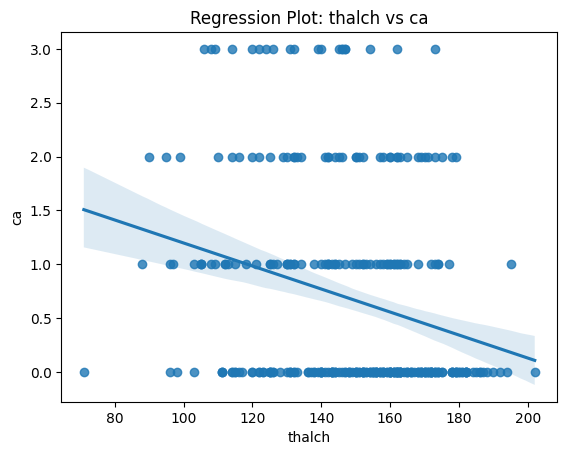

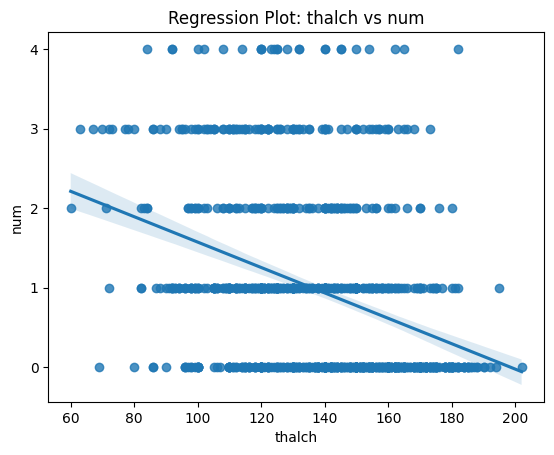

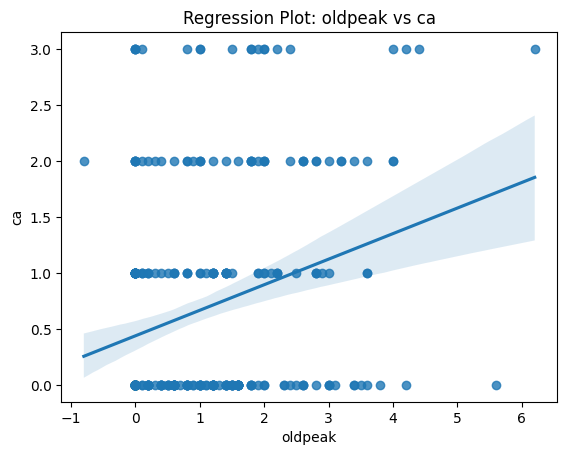

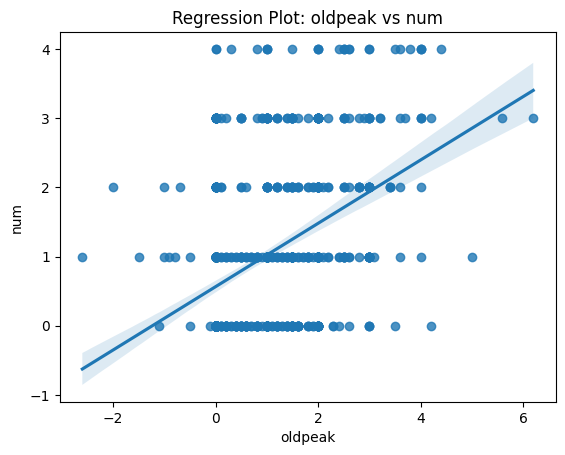

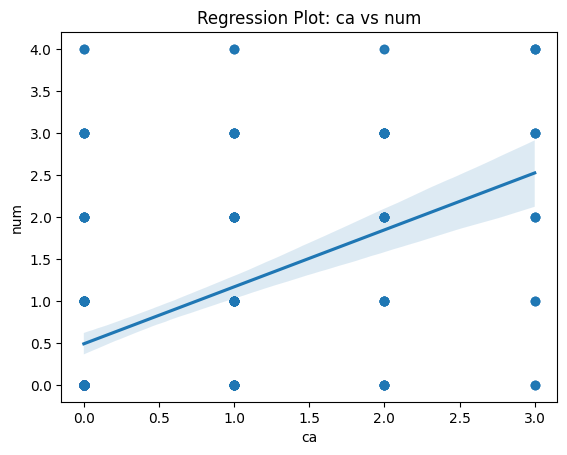

In [22]:
#regression plot:
for col1, col2 in combinations(num_cols, 2):
  if col1 != 'id' and col2 != 'id':
    plt.title(f'Regression Plot: {col1} vs {col2}')
    sns.regplot(x=df[col1], y=df[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

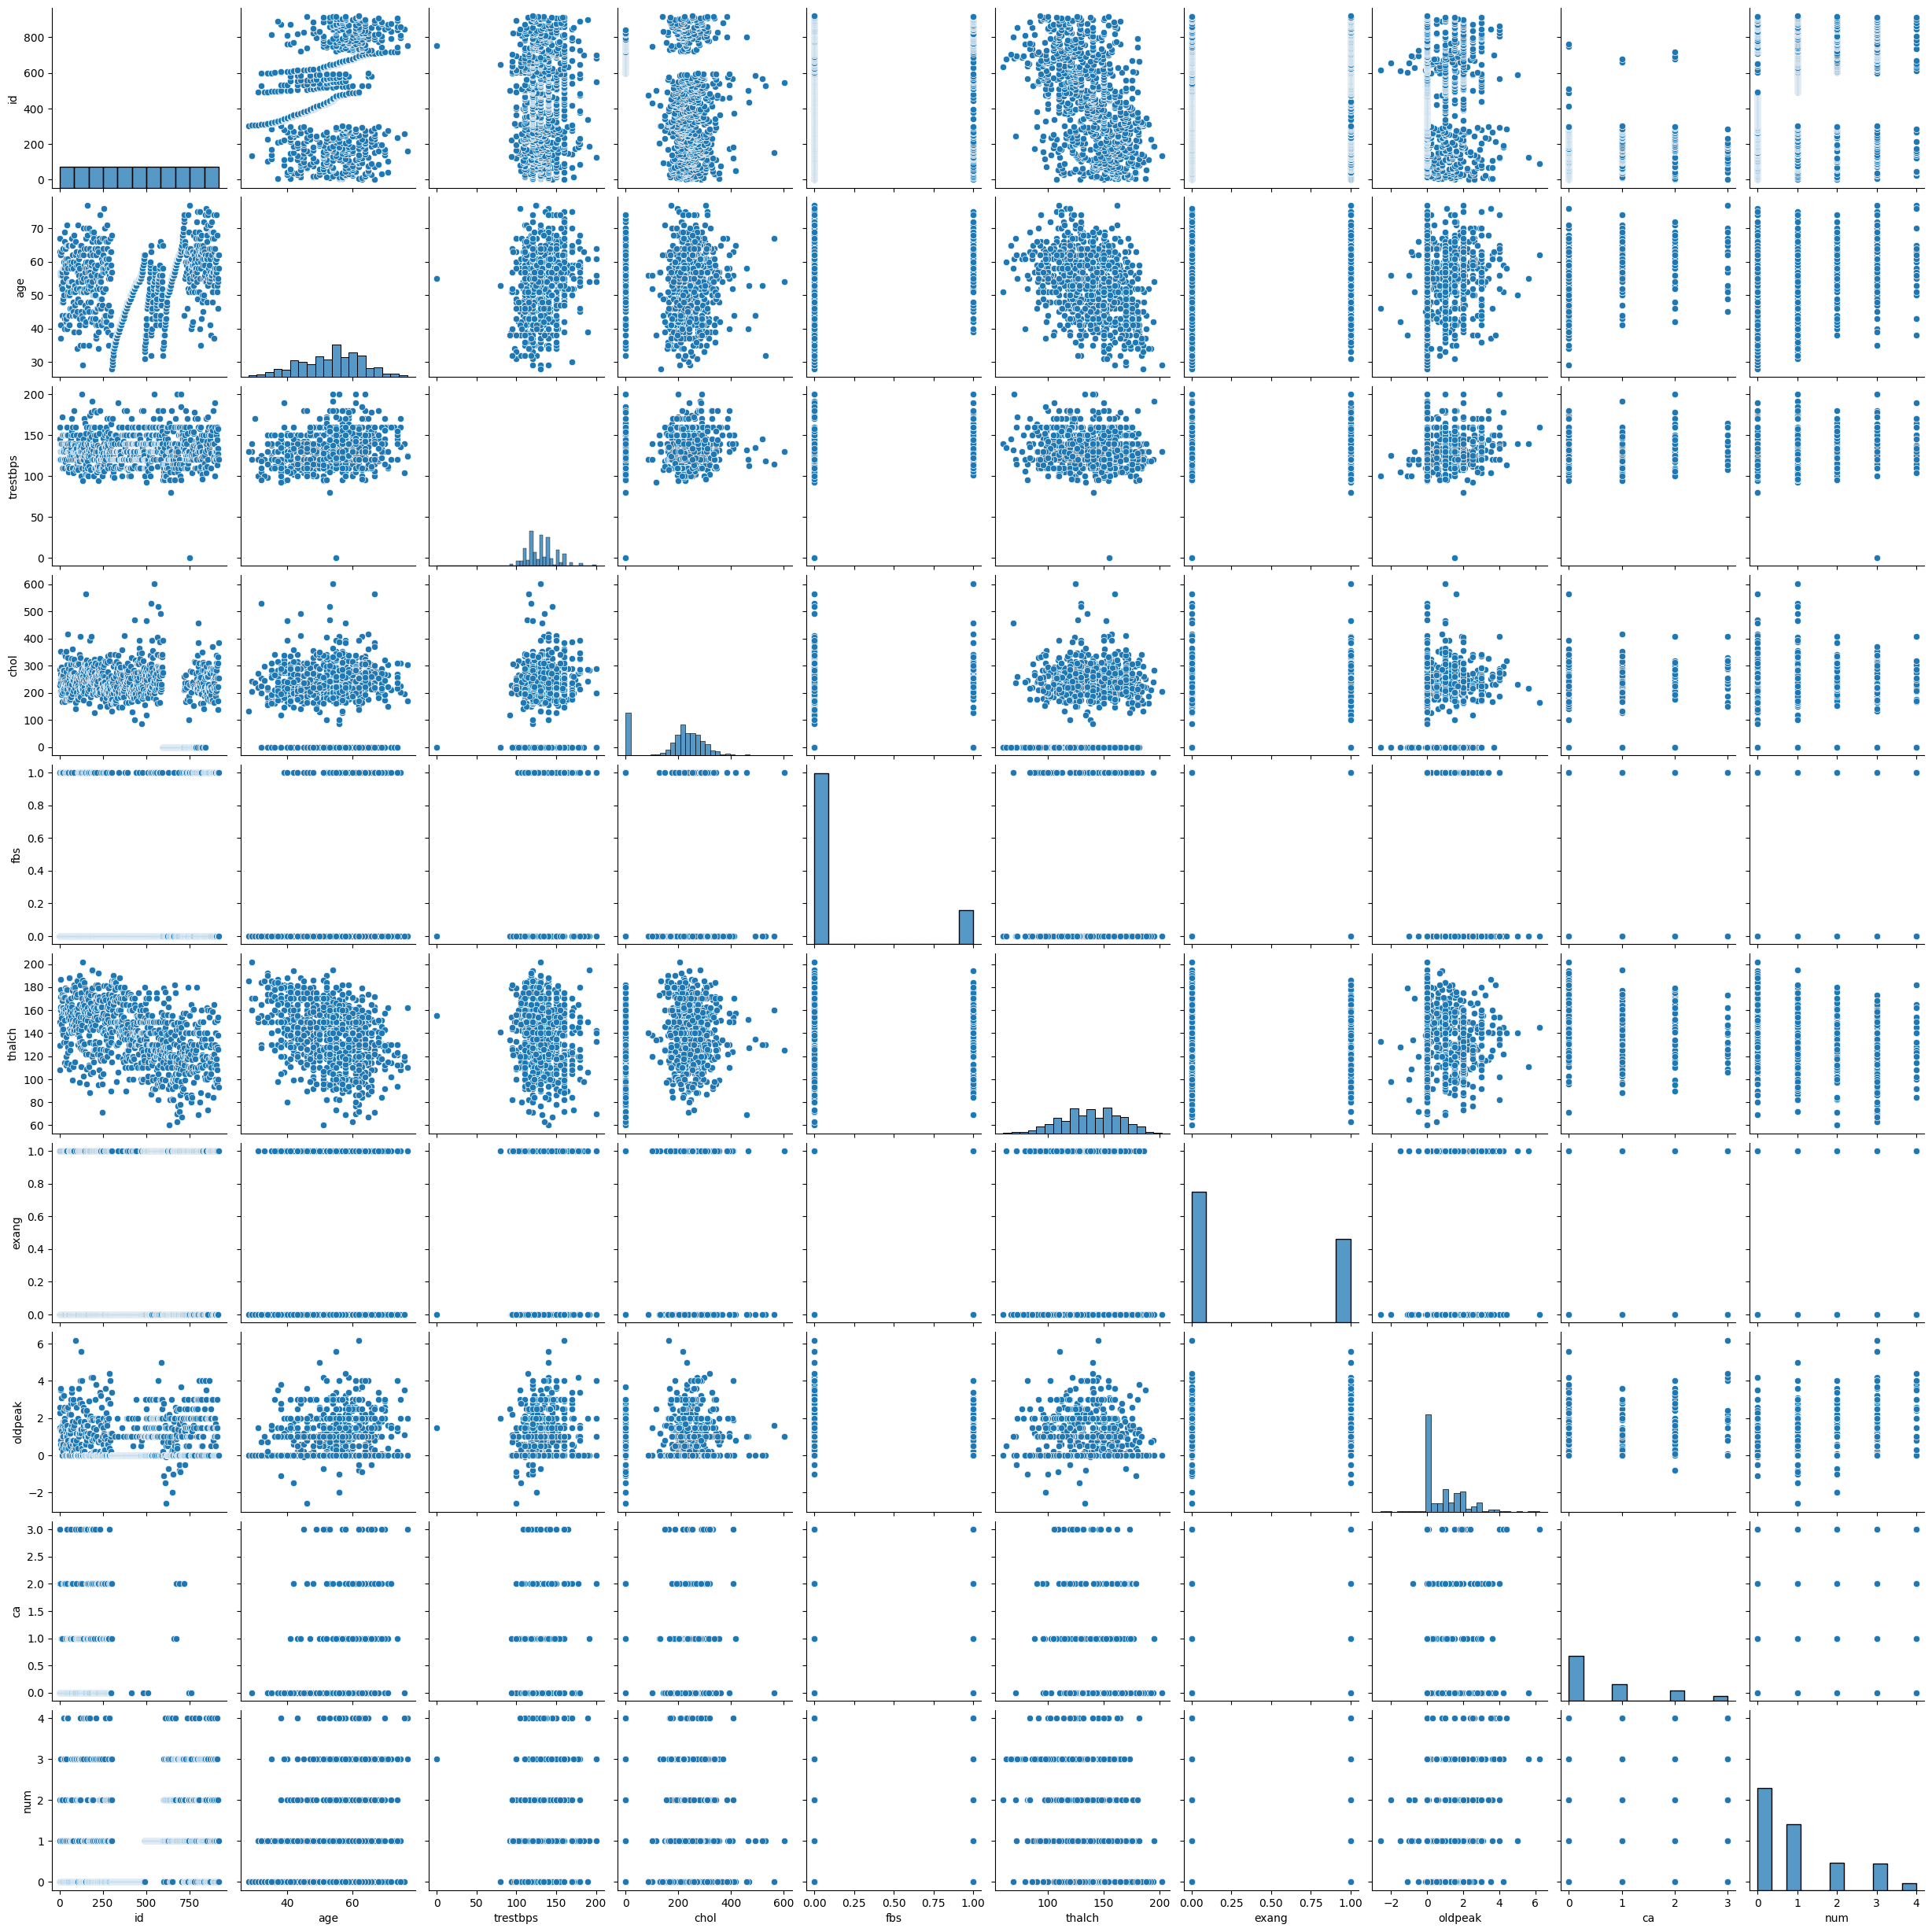

In [23]:
#pair Plote :
sns.pairplot(df)
plt.show()

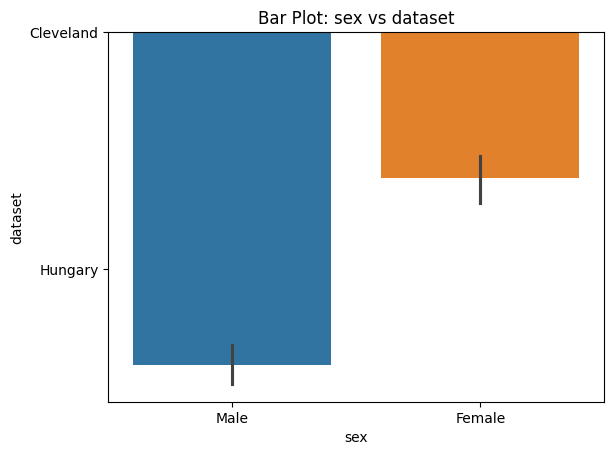

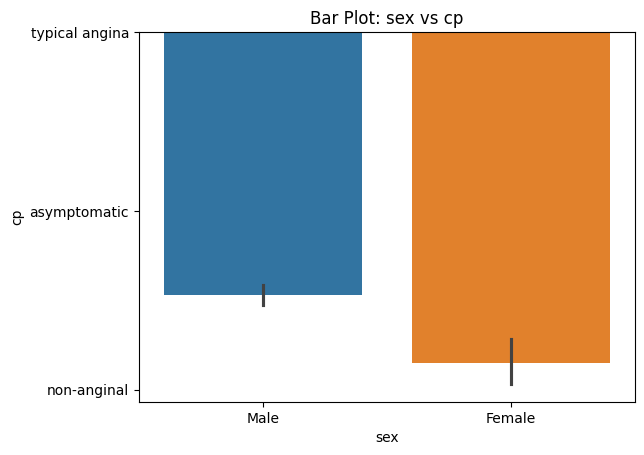

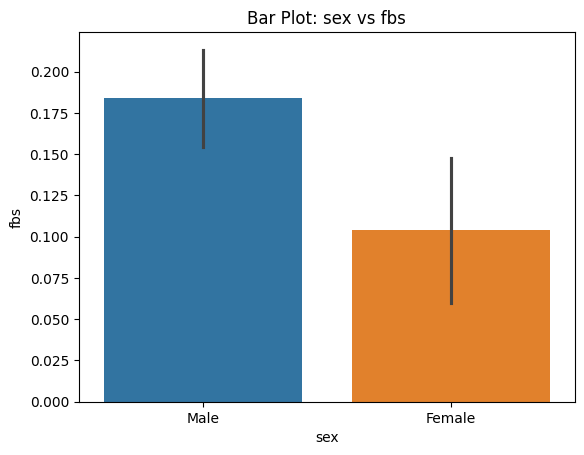

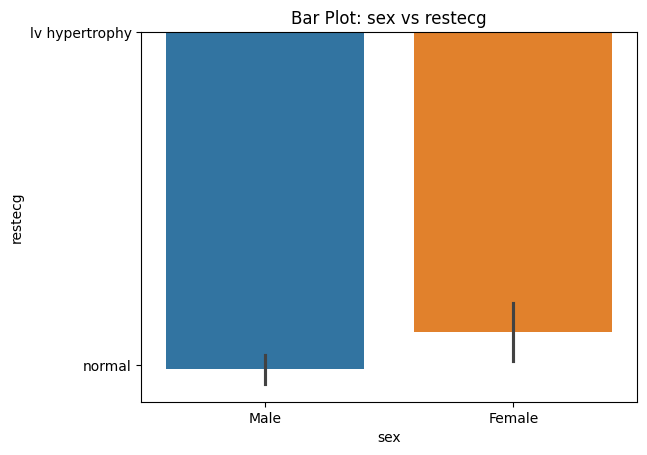

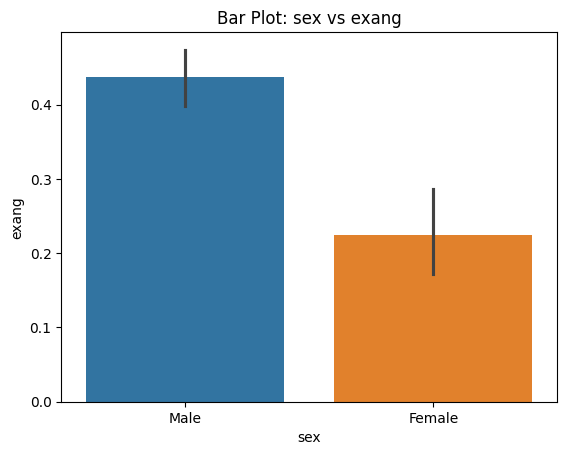

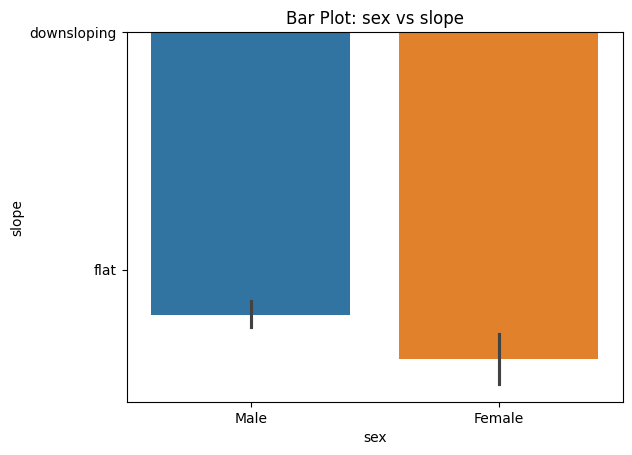

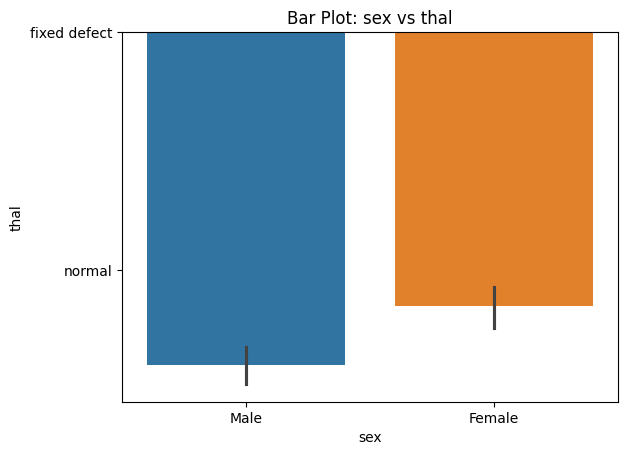

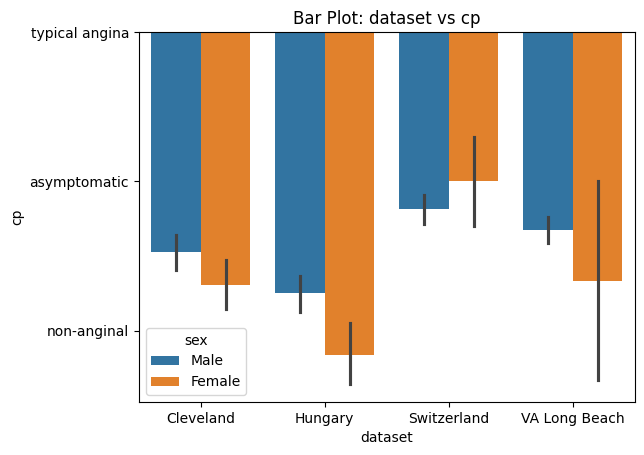

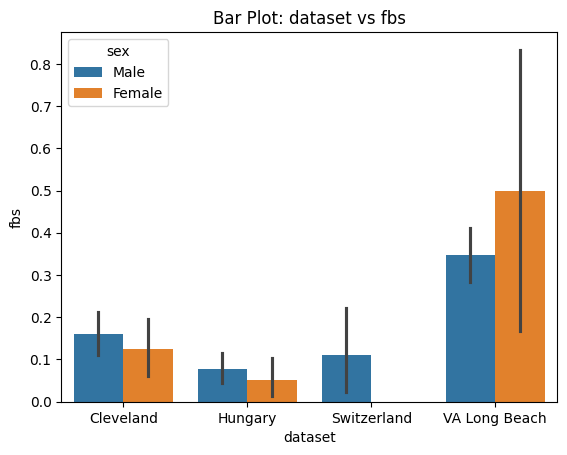

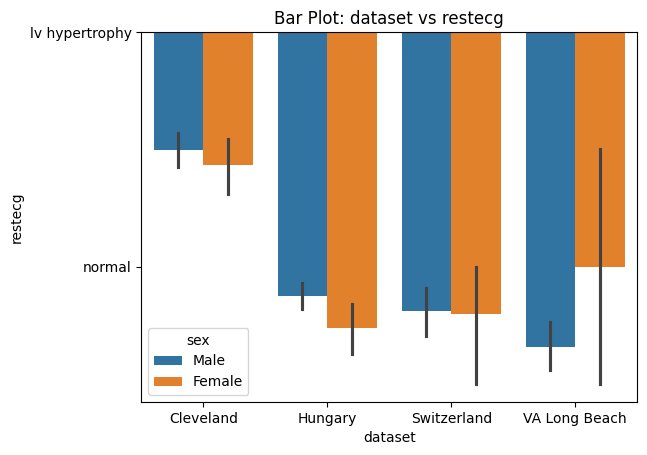

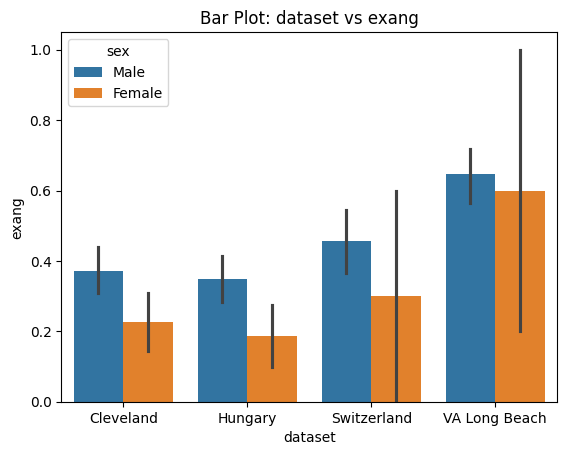

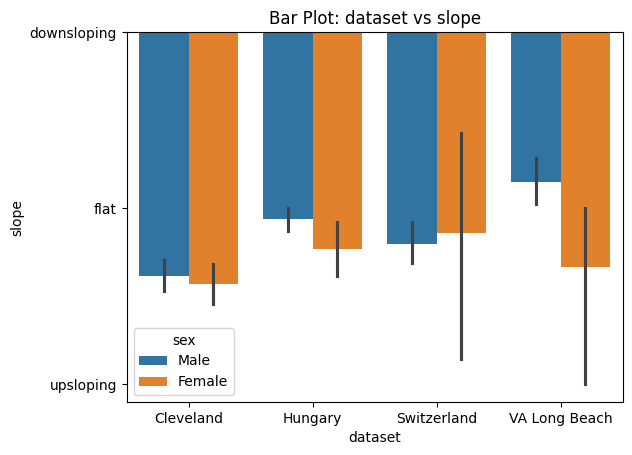

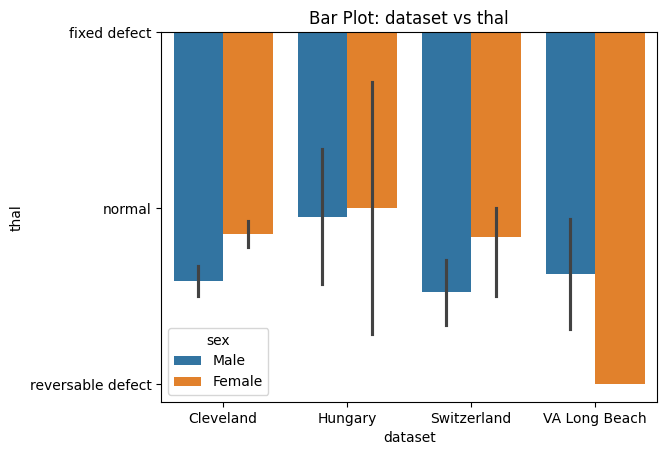

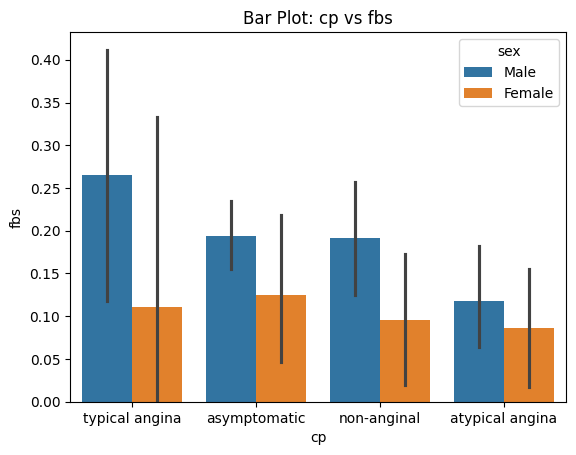

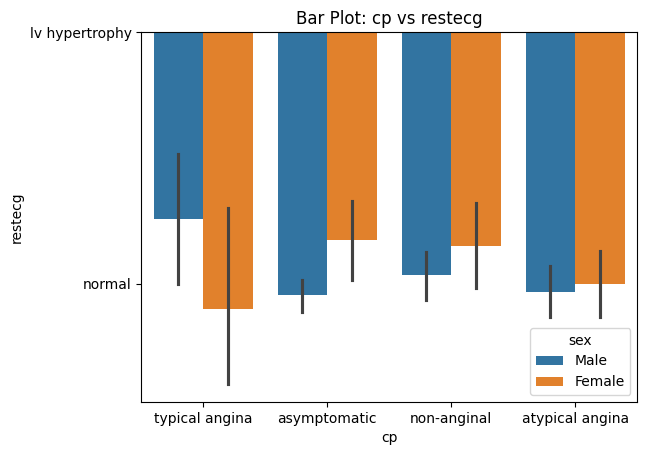

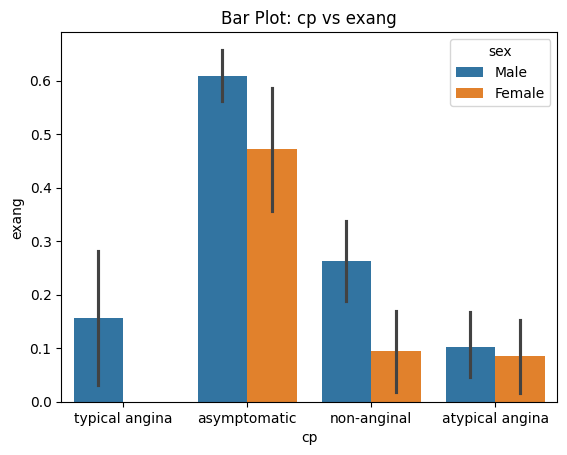

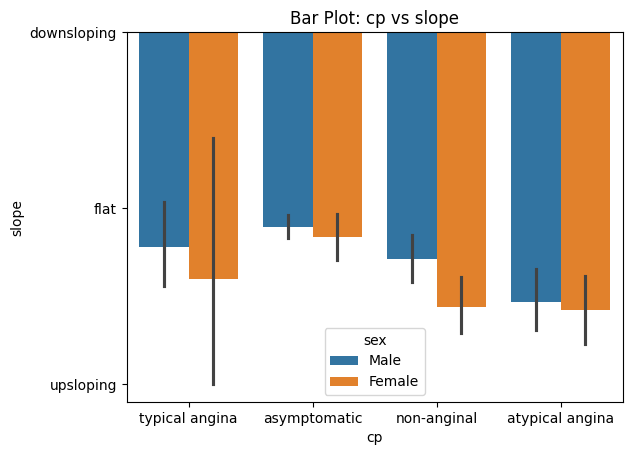

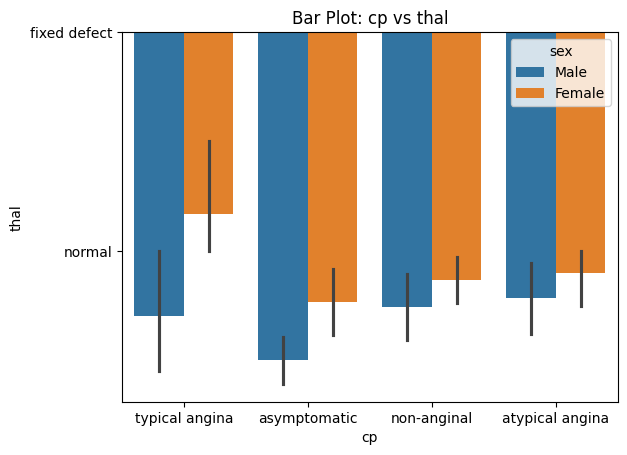

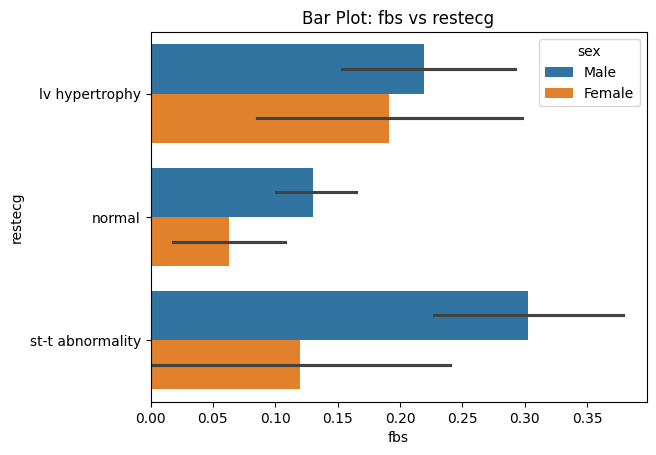

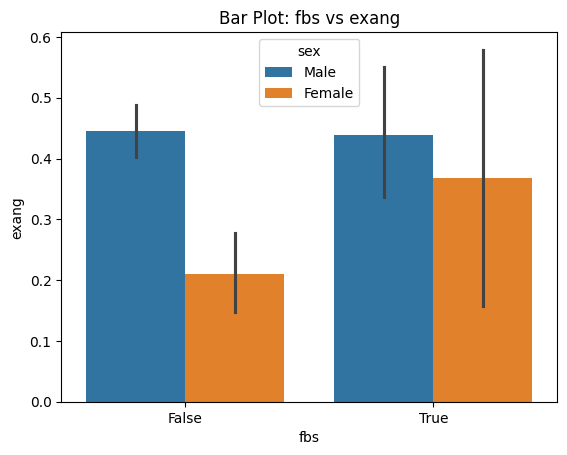

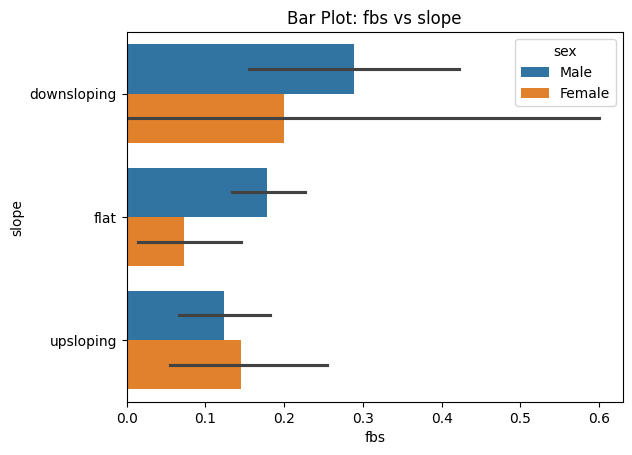

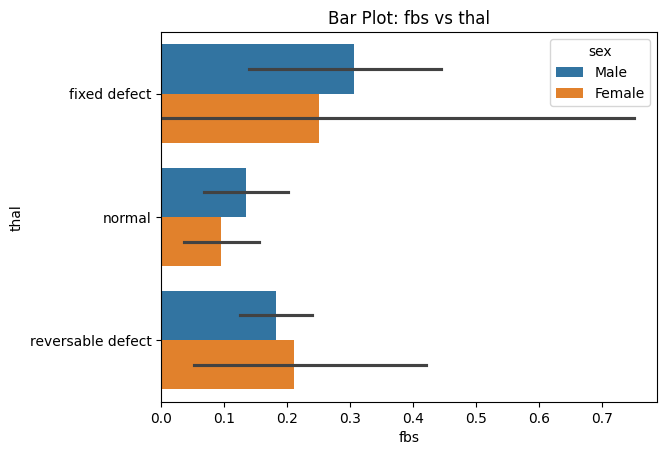

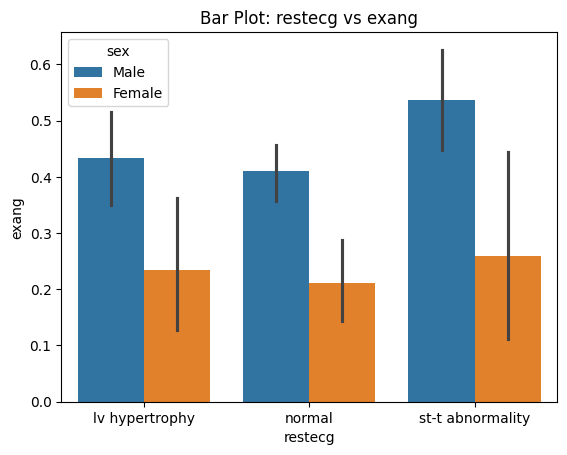

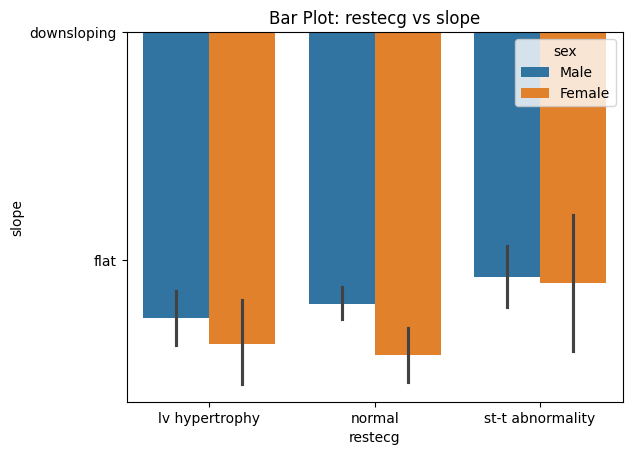

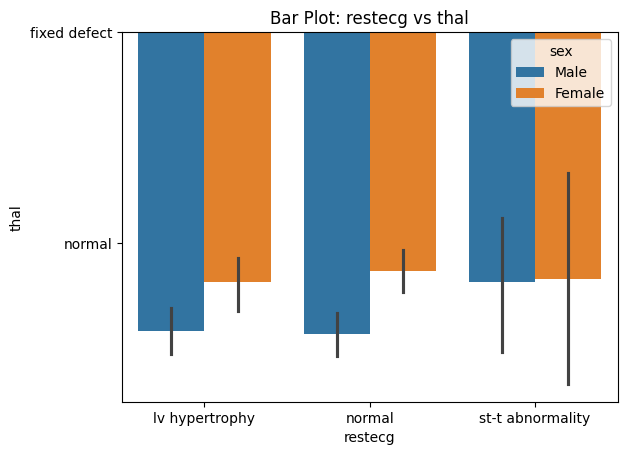

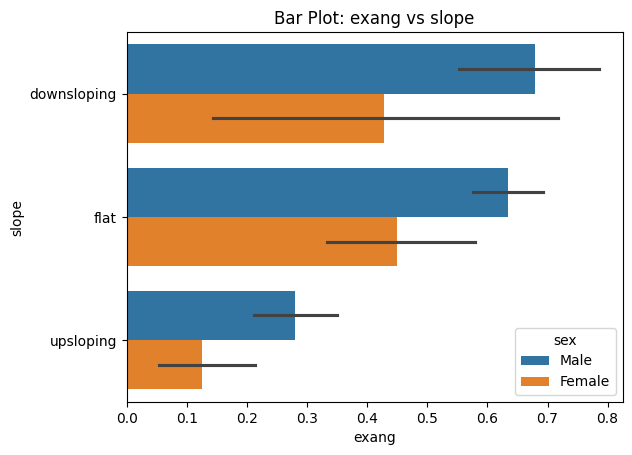

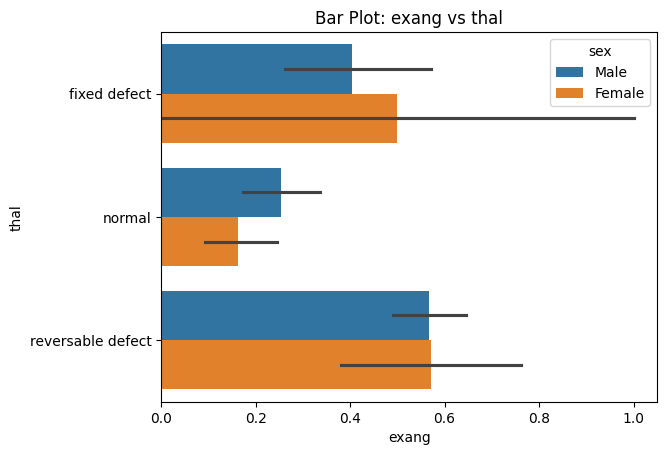

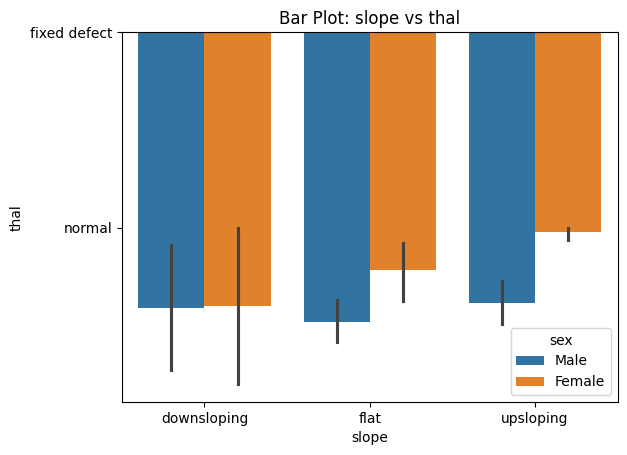

In [24]:
#bar Plot : cat vs cat/Discrete
for col1, col2 in combinations(cat_col, 2):
  if col1 != 'id' and col2 != 'id':
    plt.title(f'Bar Plot: {col1} vs {col2}')
    sns.barplot(x=df[col1], y=df[col2],hue=df['sex'])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

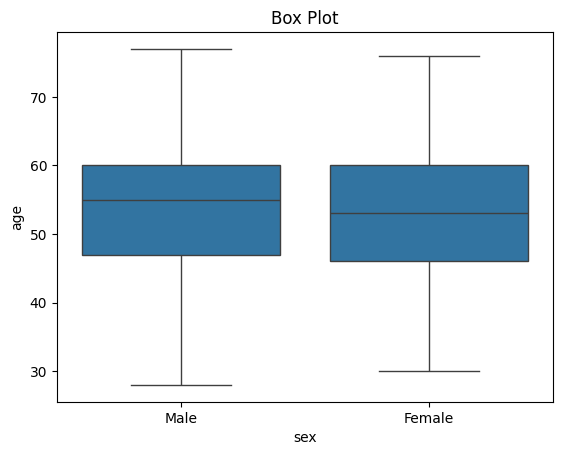

In [25]:
#box Plote : cat vs num
sns.boxplot(x=df['sex'], y=df['age'])
plt.title('Box Plot')
plt.xlabel('sex')
plt.ylabel('age')
plt.show()

## Multivariat Analysis:

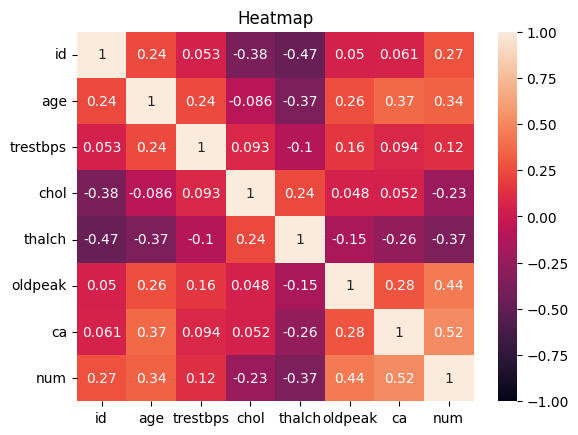

In [26]:
#heatmap:
sns.heatmap(num_col.corr(),annot=True,vmin=-1,vmax=1)
plt.title('Heatmap')
plt.show()